# COUPON ACCEPTANCE PREDICTION IN IN-VEHICLE SCENARIOS
####DATA 607 - Statistical and Machine Learning: Project  
###Group 4
- Monica Chandramurthy, 30191289<br>
- Laura Assylgazhina, 30189811<br>
- Sergey Orlov, 30187263

## Table of Contents
1. [Introduction](#introduction)
2. [Methodology](#methodology)
3. [Dataset](#dataset)
4. [Data Cleaning and Data Wrangling](#dc)
5. [GQ1. What insights can be gained from exploratory data analysis to better understand the distribution and relationships of the predictor variables and the target variable?](#gq1)
6. [GQ2. How do individual characteristics such as age, gender, income, and education influence the likelihood of accepting a coupon?](#gq2)
7. [GQ3: How do external factors like weather, time, and destination impact coupon acceptance?](#gq3)
8. [Data Transformation: One-Hot Encoding, Data Splitting, and Null Accuracy Assessment](#dv)
9. [GQ4: How accurately can we predict a driver's coupon acceptance based on the given factors?](#gq4)
10. [GQ5: How can dimensionality reduction techniques improve the performance and interpretability of our predictive models?](#gq5)
11. [GQ6: Which machine learning models and methodologies provide the best performance for predicting coupon acceptance?](#gq6)
12. [Conclusion](#conclusion)
13. [Future Scope](#fs)
14. [References](#references)


## Introduction <a name="introduction"></a>

As cars become more autonomous and connected, personalized advertising within the car - like coupons and recommendations - can significantly improve customer engagement. Predictive models play a crucial role in this evolving landscape, enabling industries to implement targeted personalization strategies for daily commutes. However, the effectiveness of these strategies relies heavily on the accuracy of the predictive models behind them. This research aims to use machine learning algorithms to make in-car coupon recommendations more accurate, combining technological advancements with practical applications in the fast-moving auto industry.

This project aims to create a model that can predict the acceptance of in-vehicle coupons by considering different drivers and situational factors. These factors include the destination, weather conditions, travel time, passenger details, and personal demographics. The study will compare the performance of various machine learning algorithms to determine the most effective one for predicting coupon acceptance.

## Methodology <a name="methodology"></a>

Our approach will involve utilizing various machine learning algorithms, beginning with fundamental supervised learning techniques such as K-Nearest Neighbors and Decision Trees, and progressing toward more advanced models like Support Vector Machines, kernel regression, and decision trees.

Regularization techniques (L1 and L2), dimensionality reduction via Principal Component Analysis, and ensemble methods such as Gradient-boosted decision trees will mitigate overfitting and enhance model performance.  

Finally, we will evaluate the performance of our models using appropriate metrics to guide further refinements.

## Dataset <a name="dataset"></a>

Our project utilizes the "In-vehicle coupon recommendation" dataset provided by the University of California, Irvine (UCI) Machine Learning Repository. This dataset, originally contributed by researchers from institutions such as Duke University, is an invaluable resource for our exploratory and predictive analyses. The analysis will initiate with data pre-processing, including missing data handling, categorical data encoding, and feature scaling.  

The data contains various driving scenarios, capturing elements like the destination, current time, weather conditions, the presence of a passenger, and more. It subsequently inquires whether the respondent would accept a coupon under the given driving conditions if they were behind the wheel.

The dataset is hosted on the UCI Machine Learning Repository, and its usage is governed by the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication.[7](#references)

The dataset boasts 12,684 instances spanning 24 distinct attributes. Here's a high-level snapshot:

1. Destination: Choices include No Urgent Place, Home, or Work.
2. Passenger: Describes car occupants as Alone, Friend(s), Kid(s), or Partner.
3. Weather: Conditions specified as Sunny, Rainy, or Snowy.
4. Temperature: Recorded values are 55, 80, or 30 degrees.
5. Time: Specific hours like 2PM, 10AM, 6PM, 7AM, or 10PM.
6. Coupon: Types include Restaurant (below \$20), Coffee House, Carryout out & Take away, Bar, or Restaurant ( between 20 to 50).
7. Expiration: Specifies if the coupon expires in 1 day or 2 hours.
8. Gender: Identified as either Female or Male.
9. Age: Categories include 21, 46, 26, 31, 41, above 50, 36, or below 21.
10. Marital Status: Options are Unmarried partner, Single, Married partner, Divorced, or Widowed.
11. Has Children: Represented by 1 (Yes) or 0 (No).
12. Education: Ranges from Some High School to Graduate degrees (Masters or Doctorate) and other levels in between.
13. Occupation: Includes professions such as Unemployed, Architecture & Engineering, Student, etc., spanning to Farming Fishing & Forestry.
14. Income: Varies from 'Less than \$12500' to ' \$100000 or More' with ranges in between.
15. Bar: Specifies frequency of bar visits monthly.
16. CoffeeHouse: Denotes how often one frequents a coffeehouse monthly.
17. CarryAway: Indicates monthly frequency of getting take-away food.
18. RestaurantLessThan20: Describes how often one dines at a restaurant with an average expense of less than \$20 per person each month.
19. Restaurant20To50: Notes monthly visits to restaurants where the average expense per person ranges between \$20 and \$50.
20. ToCoupon_GEQ15min: Binary feature indicating if the driving distance to the coupon's establishment exceeds 15 minutes.
21. ToCoupon_GEQ25min: Binary feature indicating if the driving distance to the coupon's establishment exceeds 25 minutes.
22. Direction_same: Binary value denoting if the coupon's establishment is on route to the current destination.
23. Direction_opp: Binary value indicating if the coupon's establishment lies in the opposite direction of the current destination.
24. Y: Binary outcome (1 or 0) representing coupon acceptance.

The target variable is 'Y,' a binary outcome indicating whether the coupon was accepted (1) or not (0). All other features serve as predictor variables, which will be used to train our machine-learning models to predict coupon acceptance accurately.

More information about dataset is described in the following paper ([8](#references)).


### Loading required libraries

When this notebook runs in Google Colab, it's important after the loading of libraries, to load the dataset.
To run on localhost, please make sure that you are using `scikit-learn` verstion 1.2.2. It is may be important for some functions because of syntax.

In [1]:
!pip install scikit-learn==1.2.2

In [2]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
#from google.colab import files
import requests
from io import BytesIO
from zipfile import ZipFile
from sklearn.impute import SimpleImputer
import statsmodels.formula.api as smf

In [3]:
# Loading the Dataset
# Defining the URL to fetch our dataset
url = "https://archive.ics.uci.edu/static/public/603/in+vehicle+coupon+recommendation.zip"

# Fetching the dataaset
response = requests.get(url)

# Extracting the list of files in the zip
if response.status_code == 200:
    with ZipFile(BytesIO(response.content)) as z:
        files = z.namelist()
        with z.open(files[0]) as f:
            df = pd.read_csv(f)
else:
    print("Failed to fetch data")

print(df.head())


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

## Data Cleaning and Data Wrangling <a name = "dc"></a>

A clean dataset is the backbone of any analysis. Before diving into any statistical analyses, it's imperative to clean and preprocess the data to ensure the results are accurate and reliable. Below is a comprehensive documentation of our data cleaning and wrangling process.


In [4]:
# Displaying the first few rows of the dataframe:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


To better understand how to structure following work we need to check types of columns we have in dataset:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Handling Missing Values

The presence of missing data can distort predictions and affect the accuracy of a model. Thus, it was essential to address these before proceeding.
Checking for missing values and their proportion in dataset:

In [6]:
# Handling missing values
pd.concat({'Missing Values': df.isnull().sum(),
          '% of Missing Values':round(((df.isnull().sum()/len(df))*100),2)}, axis = 1)

,Missing Values,% of Missing Values
destination,0,0.00
passanger,0,0.00
weather,0,0.00
temperature,0,0.00
time,0,0.00
coupon,0,0.00
expiration,0,0.00
gender,0,0.00
age,0,0.00
maritalStatus,0,0.00


The 'car' column has 99.15% of missing values, therefore we drop this column.

In [7]:
# Handling Missing Values
df = df.drop('car', axis=1)

For 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'columns we use imputation with filling by Most frequent values. This strategy works well with categorical variables.



In [8]:
# Columns with missing values
columns_with_missing = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the columns with missing values
imputer.fit(df[columns_with_missing])

# Impute missing values in the specified columns
df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [9]:
print('Number of missing values after cleaning and imputation:\n')
print(df.isna().sum())
print("\nData Shape after cleaning and imputatio: ", df.shape)

Number of missing values after cleaning and imputation:

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Data Shape after cleaning and imputatio:  (12684, 25)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

### Addressing Correlation among Variables

Highly correlated variables can lead to multicollinearity in regression models. Therefore, it's essential to eliminate them to ensure the model's stability.

<ipython-input-11-4ae626d796cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


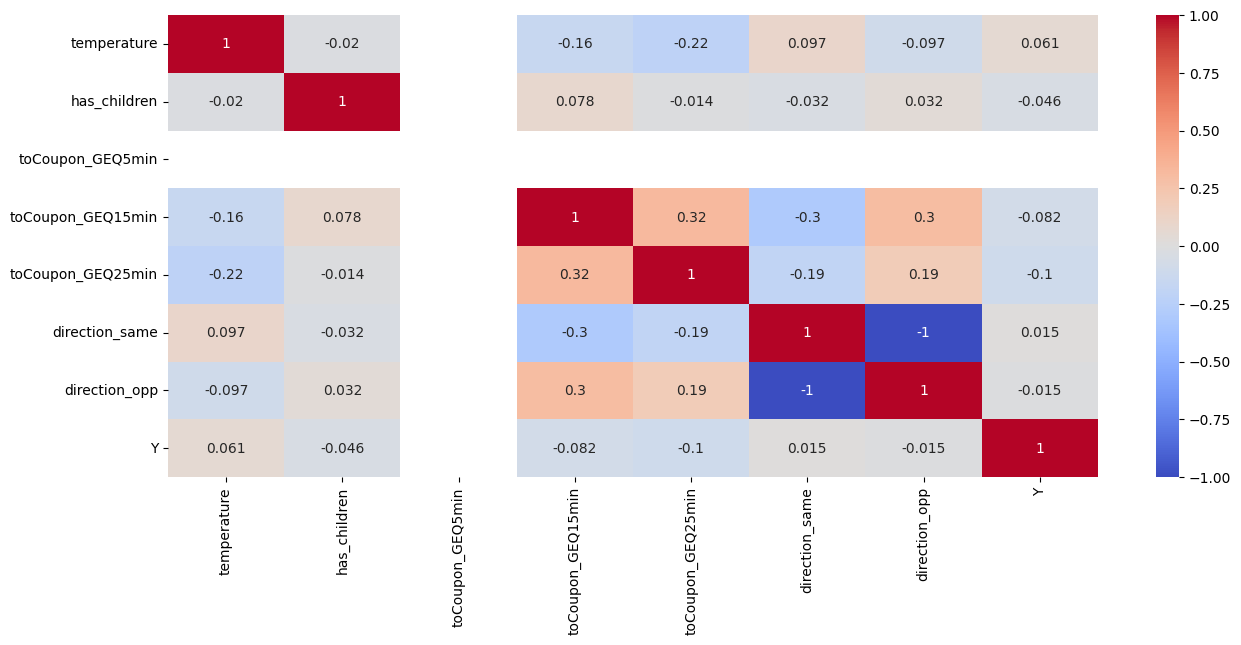

In [11]:
# heatmap to show correlation among variables
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In our dataset, the `direction_same` column was highly correlated with the `direction_opp` column, prompting us to drop one of the columns.

In [12]:
# dropping opposite direction, as this seems to feature a high level of correlation w/ direction same
df = df.drop('direction_opp', axis=1)

### Examining Unique Values

Most variables had between 2 to 6 unique values, except for the ‘Occupation’ variable, which boasted 25 unique categories. Another column, ‘toCoupon_GEQ5min’, was removed as it contained only a single unique value, making it irrelevant for our analysis.

In [13]:
# exploring ordinal categorical variables
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
Y                        2
dtype: int64

In [14]:
# dropping GEQ5min as it has only one value throughout the dataset
df.drop('toCoupon_GEQ5min', axis = 1, inplace=True)

In [15]:
print("Data Shape after retaining only necessary columns : ", df.shape)

Data Shape after retaining only necessary columns :  (12684, 23)


### Handling Duplicate Rows

Duplicate values can also introduce bias. Removing duplicate values:

In [16]:
duplicate = df[df.duplicated(keep = 'last')]
df = df.drop_duplicates()
print("Data Shape after removing duplicate values : ",df.shape)

Data Shape after removing duplicate values :  (12610, 23)


In the following sections, we will delve further into data wrangling after completing some initial exploratory data analysis.

# GQ 1 : What insights can be gained from exploratory data analysis to better understand the distribution and relationships of the predictor variables and the target variable? <a name="gq1"></a>


Analyzing the distribution plot, we can see that the count of accepted coupons slightly surpasses the count of cases where the coupon was not accepted.

In [17]:
# Checking the distribution of target variable 'Y'
fig = px.histogram(df, x='Y', color='Y', color_discrete_sequence=['#17becf', '#1f77b4'])
fig.show()

In [18]:
# checking the distribution of target variable 'Y' for class imbalances
df.groupby('Y')['Y'].count()

Y
0    5453
1    7157
Name: Y, dtype: int64

In [19]:
df.groupby('Y')['Y'].count() / len(df)

Y
0    0.432435
1    0.567565
Name: Y, dtype: float64

Target Variable (Y): Approximately 56.75% of the observations have a value of '1', while 43.24% have a value of '0'.

Our predicting variables can be divided to the next categories:
- **Coupon Details:** Expiration and type (Coffee house, Restaurant, Bar, Carryout & Take away), which we will explore bellow in this section.
- **Lifestyle habits:** Frequency of visits to coffeehouses, restaurants, and takeaway services, which we will explore bellow in this section.
- **Demographics:** Age, gender, income, education, marital status, occupation, children (analysed in guiding question 2)
- **External factors:** Weather, temperature, time, destination type, passengers in the car, driving direction, driving distance to the restaurant/bar for using the coupon (analysed in guiding question 3)

Let's first examine the distribution of our target variable (coupon acceptance) within the context of **coupon characteristics**, such as coupon type and coupon expiration.

In [20]:
variables = [col for col in df.columns if col in ('coupon', 'expiration') ]
for var in variables:
    fig = px.histogram(df, x=var, color='Y', title=f'{var} vs Coupon Acceptance',
                       color_discrete_sequence=['#17becf', '#1f77b4'], nbins=30)
    fig.update_layout(xaxis={'categoryorder': 'total descending'})
    fig.show()

- After analyzing the graph that displays the different coupon categories and their acceptance rates, we can see that the 'Coffee House' category has an almost equal balance of accepted and unaccepted coupons. This implies that this particular coupon type may not have a significant impact on the acceptance of coupons. However, the other categories such as 'Restaurant,' 'Bar,' and 'Carry Out & Take Away' have noticeable differences in their accepted and unaccepted coupon distributions. These variations in distribution could potentially have a meaningful role in predicting the response variable.
- After analyzing the effect of coupon expiration, it is evident that coupons with a 1-day expiration period have a greater impact on coupon acceptance than those with a 2-hour expiration.

Considering **lifestyle habits**, it is reasonable to assume that they could vary across genders. As a result, we will conduct separate analyses for each gender to explore these potential differences.

In [21]:
# Categorical variables (lifestyle habits) to analyze
categorical_vars = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Order for the categorical variables
category_order = ['never', 'less1', '1~3', '4~8', 'gt8']

# Create plots for each categorical variable
for var in categorical_vars:
    coupon_acceptance = df.groupby([var, 'gender'])['Y'].mean().reset_index()
    df[var] = pd.Categorical(df[var], categories=category_order, ordered=True)
    fig = px.bar(coupon_acceptance, x=var, y='Y', color='gender', barmode='group', color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_layout(title=f"Proportion of Coupon Acceptance by {var} and Gender", xaxis_title=var, yaxis_title="Proportion of Coupon Acceptance")
    fig.show()

- Analyzing the plots above, we discern notable disparities in coupon acceptance concerning gender and lifestyle habits, specifically with respect to the frequency of visiting different establishments. For instance, we observe that males who frequently visit venues (more than 8 times per month) such as Bars, Coffee Houses, Carry Away services, and Restaurants (with a budget of less than $20) tend to exhibit higher rates of coupon acceptance compared to females with equivalent visitation patterns.

- However, in the restaurant category that costs between $20-50, it is noticeable that women who visit these places (more than 8 times per month) are more inclined to use coupons than men in the same category.

## GQ2: How do individual characteristics such as age, gender, income, and education influence the likelihood of accepting a coupon? <a name="gq2"></a>

To address this question, we checked the proportion of the distibution by coupon and a series of chi-square tests were conducted on individual characteristics followed by a logistic regression analysis.

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



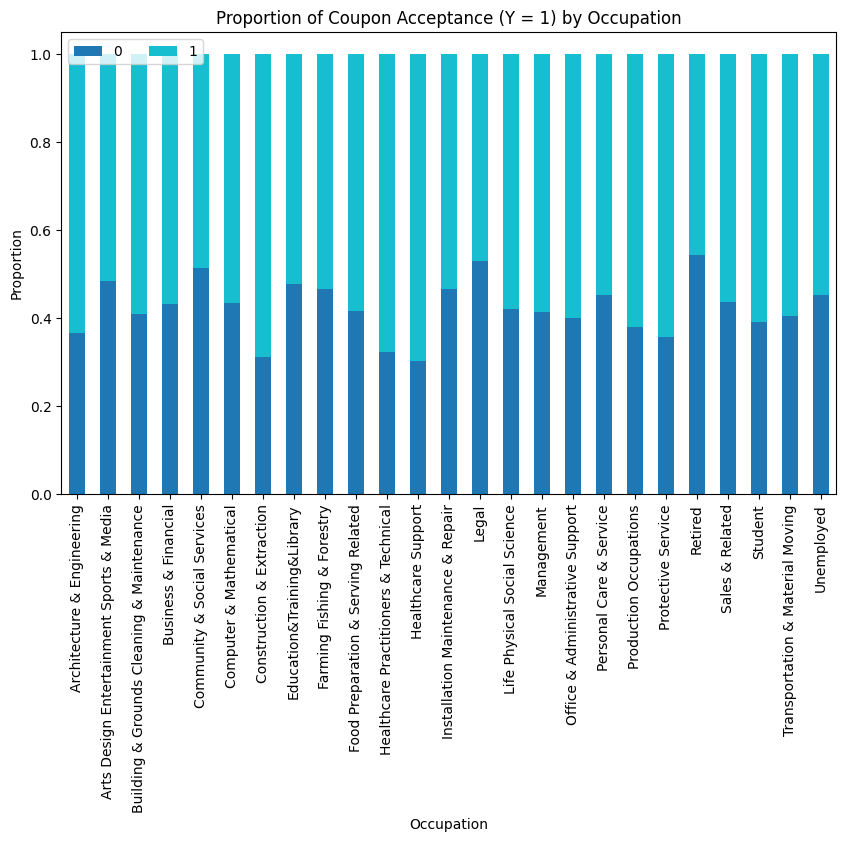

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



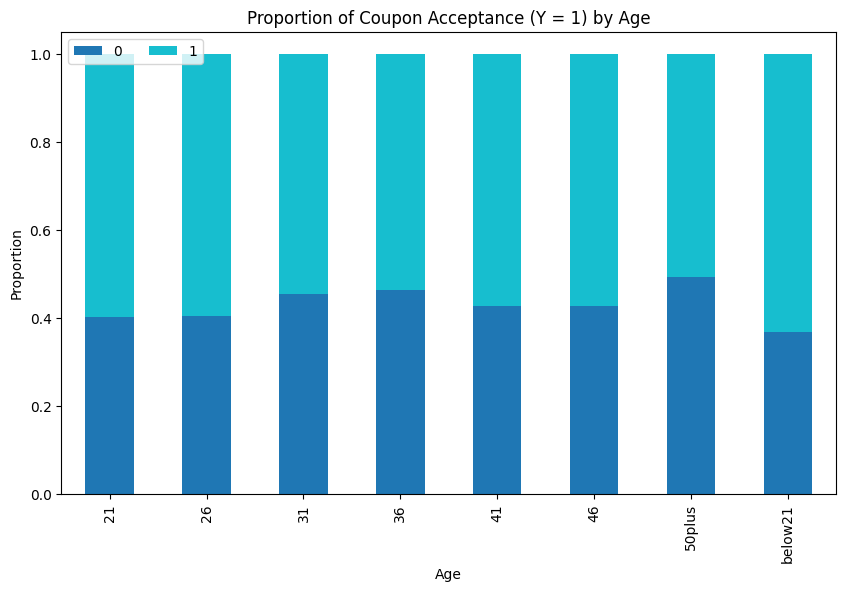

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



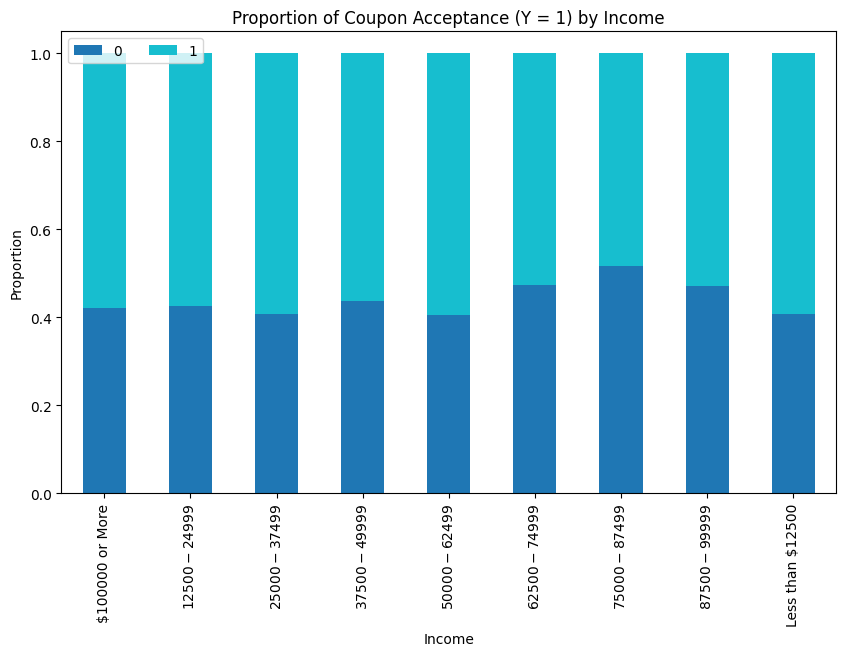

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



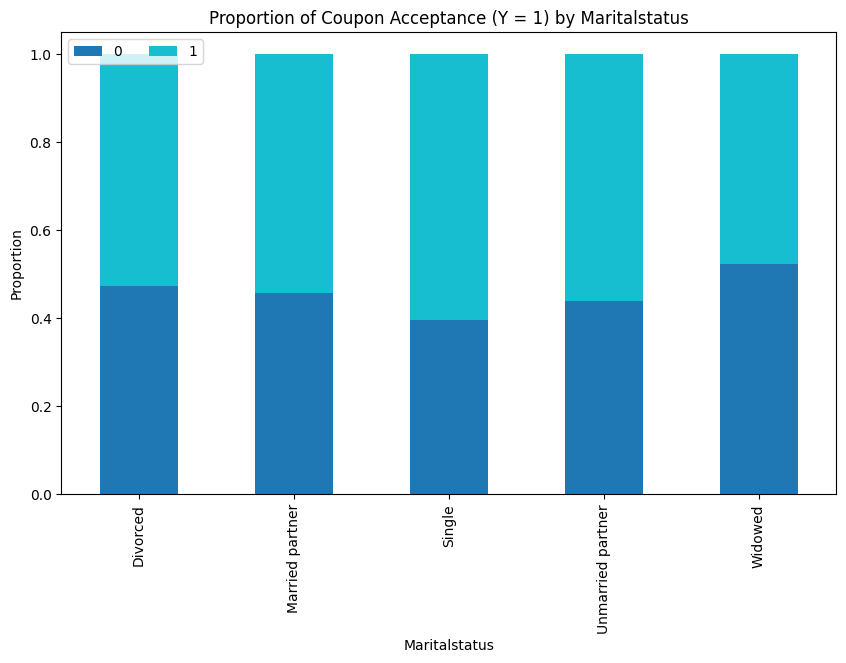

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



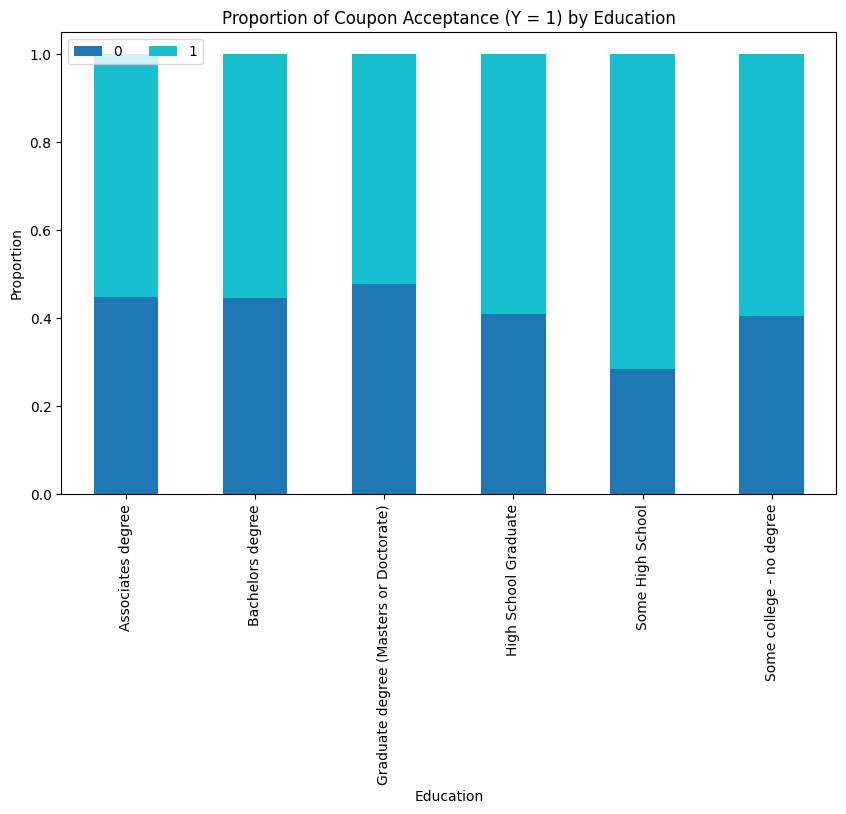

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



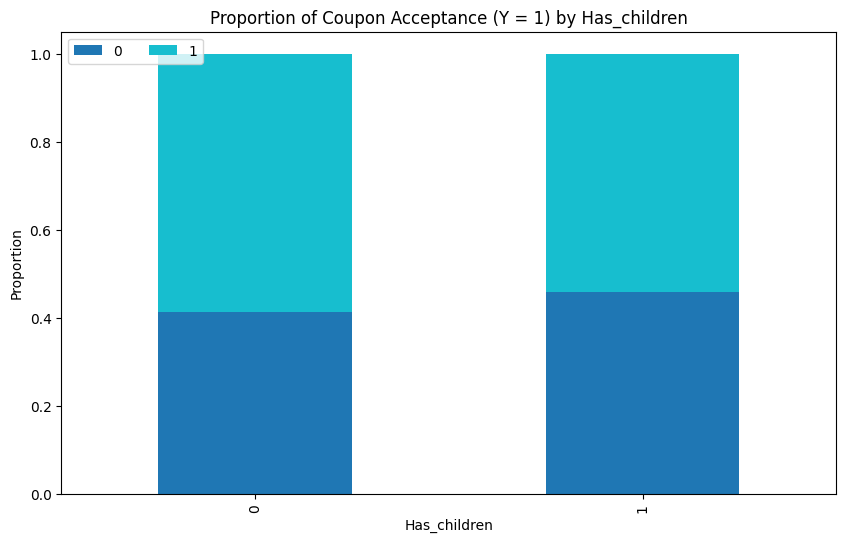

<ipython-input-22-4e269062b42a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



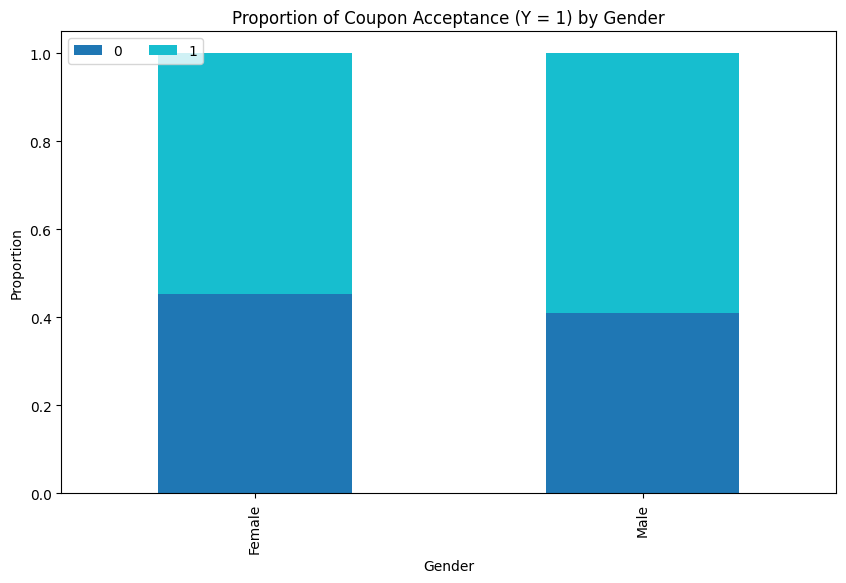

In [22]:
# Question 2: How do individual characteristics such as age, gender, income, and education influence the likelihood of accepting a coupon?

variables = ['occupation', 'age', 'income', 'maritalStatus',  'education', 'has_children', 'gender']

# Loop through each categorical variable
for var in variables:
    pivot_table = df.groupby([var, 'Y']).size().reset_index(name='count')
    pivot_table['proportion'] = pivot_table.groupby(var)['count'].apply(lambda x: x / x.sum())

    # Pivot the pivot_table to get 'Y' and 'N' as separate columns
    cross_tab_prop = pivot_table.pivot(index=var, columns='Y', values='proportion')

    # Create the stacked bar chart
    cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

    plt.legend(loc="upper left", ncol=2)
    plt.xlabel(var.capitalize())  # Set the x-axis label to the variable name
    plt.ylabel("Proportion")
    plt.title(f"Proportion of Coupon Acceptance (Y = 1) by {var.capitalize()}")

    plt.show()

In [23]:
from scipy.stats import chi2_contingency

# List of categorical variables to test
categorical_vars = ['occupation', 'age', 'income', 'maritalStatus',  'education', 'has_children', 'gender']

# Conduct chi-square tests for each variable
results = []
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((var, chi2, p, dof, expected))

# Print the results
for var, chi2, p, dof, expected in results:
    print(f"Variable: {var}")
    print("Chi-square:", chi2)
    print("P-value:", p)
    print("Significant association:", p < 0.05)
    print("=" * 40)

Variable: occupation
Chi-square: 121.39943887855496
P-value: 5.4617925404234545e-15
Significant association: True
Variable: age
Chi-square: 63.32626737811425
P-value: 3.25997601211412e-11
Significant association: True
Variable: income
Chi-square: 49.927272396969855
P-value: 4.2204009018346824e-08
Significant association: True
Variable: maritalStatus
Chi-square: 47.567974892424566
P-value: 1.1612257960104083e-09
Significant association: True
Variable: education
Chi-square: 43.06241677972916
P-value: 3.5889863288926715e-08
Significant association: True
Variable: has_children
Chi-square: 25.414767656703436
P-value: 4.6236508293961426e-07
Significant association: True
Variable: gender
Chi-square: 23.94946158452324
P-value: 9.889794644237712e-07
Significant association: True


**Chi-square Analysis:**
This test is used here to determine if two categorical variables (predictor and target variable) are independent or if they are in fact related to one another. The chi-square test results indicated statistically significant associations between the likelihood of accepting a coupon and the following individual characteristics:

- Occupation: χ^2 = 121.39, p < 0.001
- Age: χ^2 = 63.32, p < 0.001
- Income: χ^2 = 49.92, p < 0.001
- Marital Status: χ^2 = 47.56, p < 0.001
- Education: χ^2 = 43.06, p < 0.001
- Has children: χ^2 = 25.41, p < 0.001
- Gender: χ^2 = 23.94, p < 0.001

The results show that all the listed variables have a significant association with coupon acceptance.



In [24]:
lm = smf.logit('Y ~ age + gender + income + education + occupation + has_children + maritalStatus', data = df).fit()
p_values = lm.pvalues
significant_vars = p_values[p_values < 0.05].index

# Get the coefficients and other relevant information
summary_df = pd.DataFrame(lm.summary2().tables[1][['Coef.', 'P>|z|']])

# Filter and print only significant variables
significant_summary = summary_df.loc[significant_vars]
significant_summary

Optimization terminated successfully.
         Current function value: 0.673637
         Iterations 5


,Coef.,P>|z|
Intercept,0.713707,0.000955
age[T.31],-0.143769,0.036806
age[T.36],-0.216422,0.006785
age[T.50plus],-0.181941,0.022906
gender[T.Male],0.115920,0.004528
income[T.$62500 - $74999],-0.229865,0.008858
income[T.$75000 - $87499],-0.414161,0.000002
income[T.$87500 - $99999],-0.183296,0.035365
education[T.Some High School],0.718343,0.004727
occupation[T.Arts Design Entertainment Sports & Media],-0.523844,0.004160



**Logistic Regression Analysis:**
A logistic regression model was constructed to determine the influence of individual characteristics on coupon acceptance. The findings were as follows:

- Age:

> Ages 31: Negative influence (Coef = -0.143769, p = 0.036806)<br>
> Ages 36: Negative influence (Coef = -0.216422, p = 0.0.06785)<br>
> Ages 50+: Negative influence (Coef = -0.181941, p = 0.022906)<br>

- Gender:
> Male: Positive influence (Coef = 0.115920, p = 0.004528)<br>

- Income:
> Income between \$62,500 and \$74,999: Negative influence (Coef = -0.229865, p = 0.008858)<br>
> Income between \$75,000 and \$87,499: Strong negative influence (Coef = -0.414161, p = 0.000002)<br>
> Income between \$87,500 and \$99,999: Negative influence (Coef = -0.183296, p = 0.035365)<br>

- Education:
> Some High School: Positive influence (Coef = 0.718343, p = 0.004727)<br>
Occupation:
> Different professions varied in their influence. For example, individuals in the "Arts, Design, Entertainment, Sports & Media" occupation showed a negative influence (Coef = -0.523844, p = 0.004160).<br>

**Summary:**
The analysis reveals that individual characteristics significantly influence the likelihood of accepting a coupon. For instance, being male or having only some high school education positively influences coupon acceptance, while being in certain age brackets or income ranges reduces the likelihood. Furthermore, occupation appears to play a significant role in determining coupon acceptance, with varying effects depending on the profession.

Recommendations and marketing strategies should take these findings into account to tailor coupon promotions more effectively to targeted demographic groups.


## GQ3: How do external factors like weather, time, and destination impact coupon acceptance? <a name="gq3"></a>

To assess this query again, chi-square tests were employed to evaluate associations between external factors and coupon acceptance. A logistic regression analysis followed this to determine the influence of these variables.

Weather, temperature, time, destination type, passengers in the car, driving direction, driving distance to the restaurant/bar for using the coupon

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  object  
 1   passanger             12610 non-null  object  
 2   weather               12610 non-null  object  
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  object  
 5   coupon                12610 non-null  object  
 6   expiration            12610 non-null  object  
 7   gender                12610 non-null  object  
 8   age                   12610 non-null  object  
 9   maritalStatus         12610 non-null  object  
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  object  
 12  occupation            12610 non-null  object  
 13  income                12610 non-null  object  
 14  Bar                   12610 non-null  category
 15  Co

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



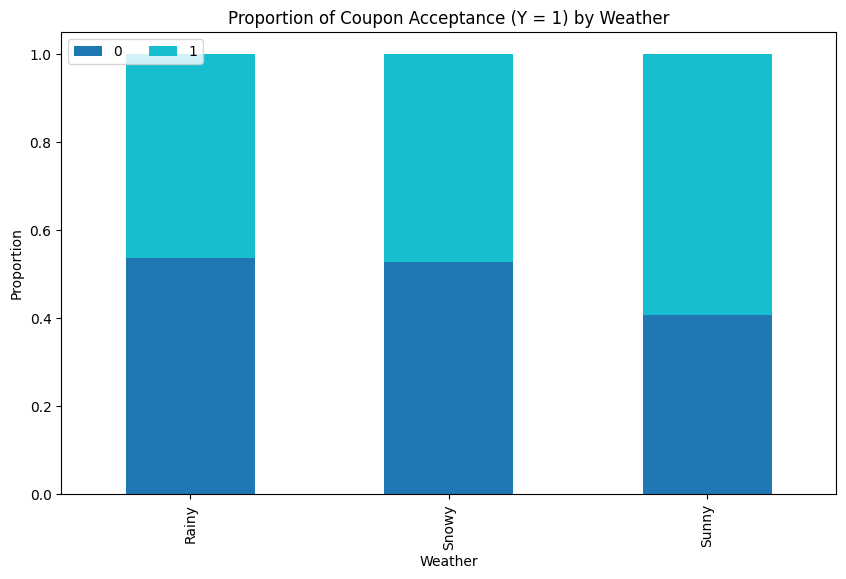

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



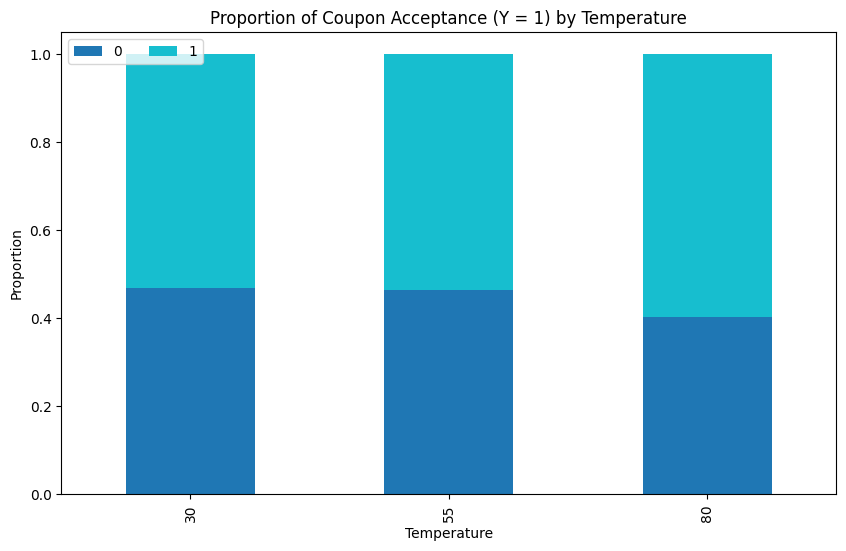

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



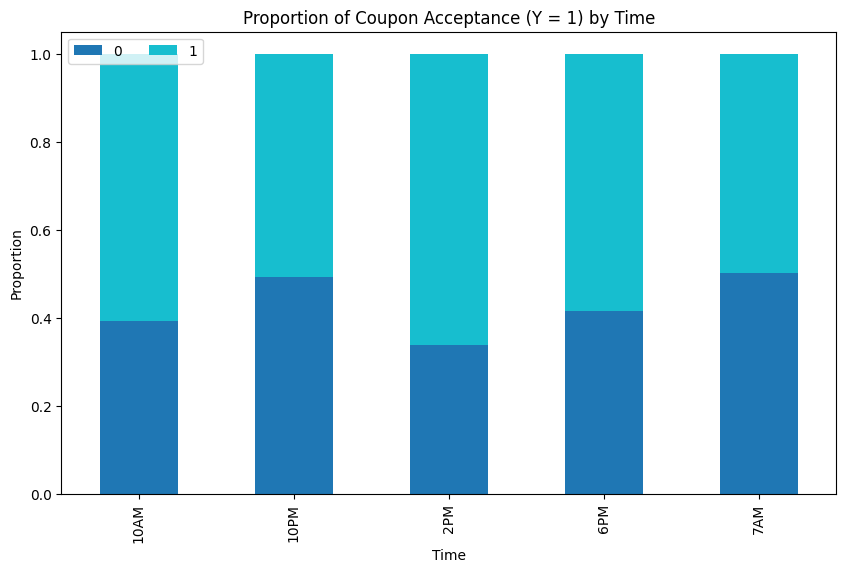

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



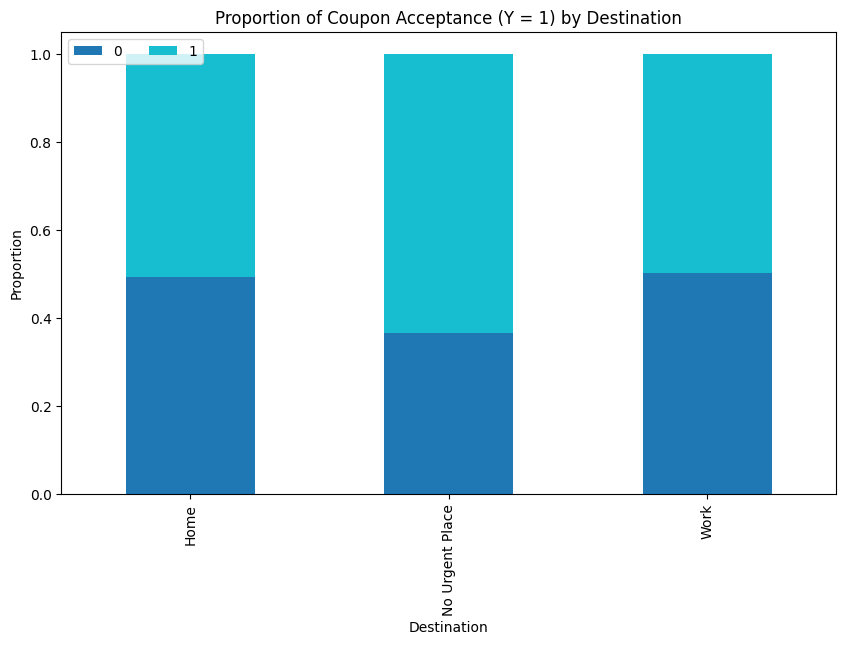

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



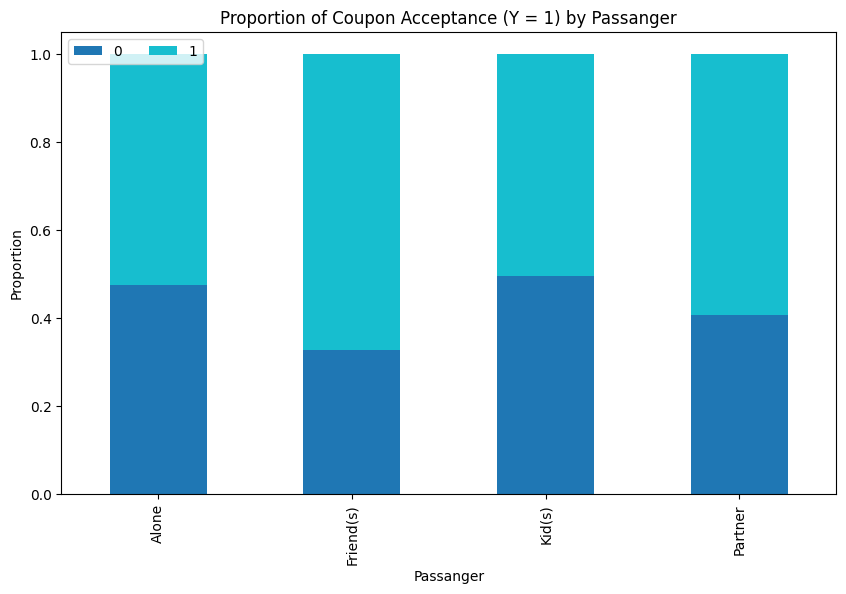

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



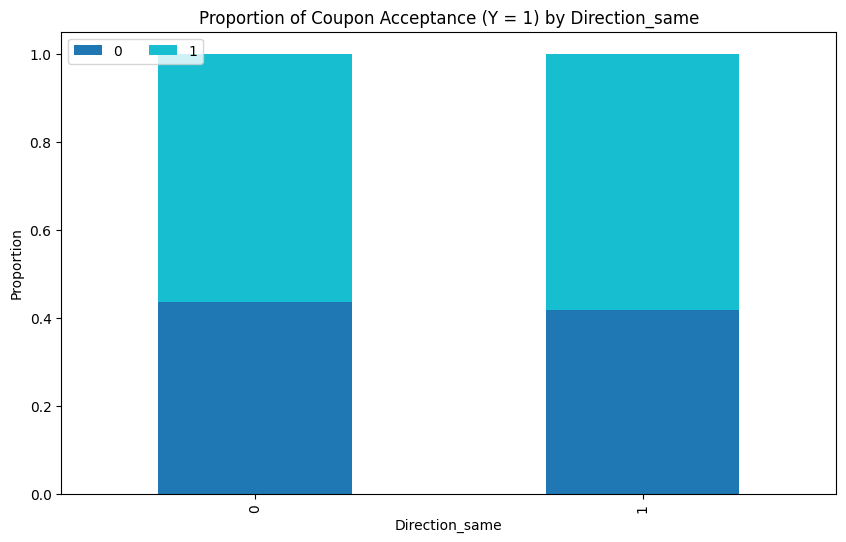

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



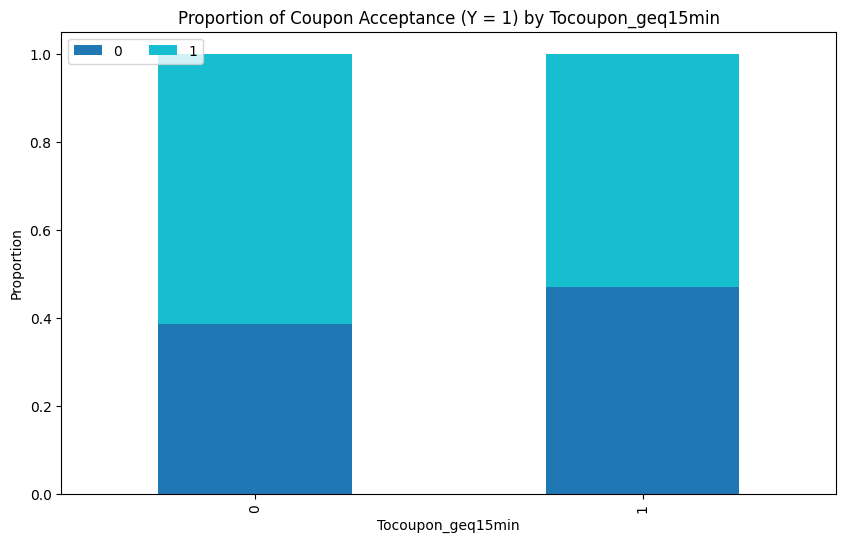

<ipython-input-26-c05dbcc61e83>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



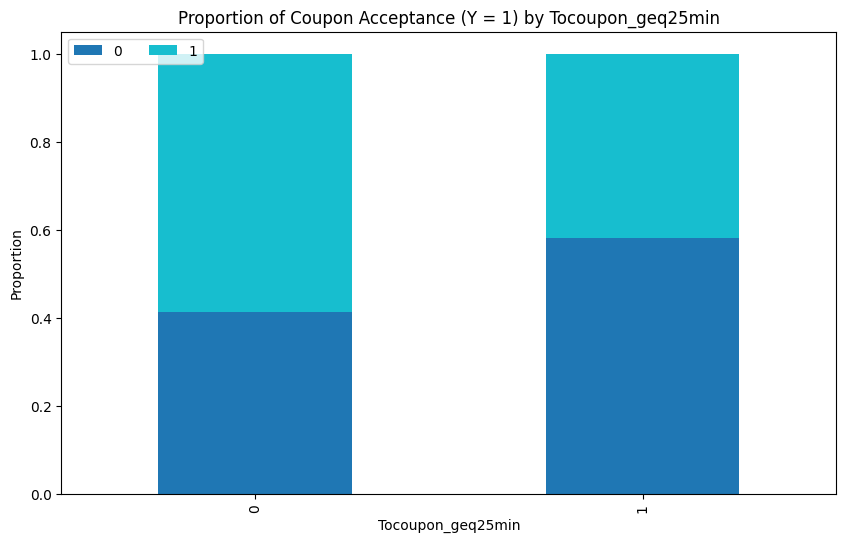

In [26]:
# Question 3: How do external factors like weather, time, and destination impact coupon acceptance?

external_variables = ['weather', 'temperature','time', 'destination', 'passanger', 'direction_same', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Loop through each categorical variable
for var in external_variables:
    pivot_table = df.groupby([var, 'Y']).size().reset_index(name='count')
    pivot_table['proportion'] = pivot_table.groupby(var)['count'].apply(lambda x: x / x.sum())

    # Pivot the pivot_table to get 'Y' and 'N' as separate columns
    cross_tab_prop = pivot_table.pivot(index=var, columns='Y', values='proportion')

    # Create the stacked bar chart
    cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

    plt.legend(loc="upper left", ncol=2)
    plt.xlabel(var.capitalize())  # Set the x-axis label to the variable name
    plt.ylabel("Proportion")
    plt.title(f"Proportion of Coupon Acceptance (Y = 1) by {var.capitalize()}")

    plt.show()

In [27]:
# List of external categorical variables to test
categorical_vars2 = ['weather', 'temperature','time', 'destination', 'passanger', 'direction_same', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Conduct chi-square tests for each variable
results = []
for var in categorical_vars2:
    contingency_table = pd.crosstab(df[var], df['Y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((var, chi2, p, dof, expected))

# Print the results
for var, chi2, p, dof, expected in results:
    print(f"Variable: {var}")
    print("Chi-square:", chi2)
    print("P-value:", p)
    print("Significant association:", p < 0.05)
    print("=" * 40)

Variable: weather
Chi-square: 132.7505842128504
P-value: 1.4913408138835103e-29
Significant association: True
Variable: temperature
Chi-square: 52.42937273795145
P-value: 4.121984602234104e-12
Significant association: True
Variable: time
Chi-square: 179.42710661602547
P-value: 9.898537330148834e-38
Significant association: True
Variable: destination
Chi-square: 220.42935144767222
P-value: 1.362619213504897e-48
Significant association: True
Variable: passanger
Chi-square: 223.76213979502253
P-value: 3.086242931837786e-48
Significant association: True
Variable: direction_same
Chi-square: 2.738682157383877
P-value: 0.09794551080620423
Significant association: False
Variable: toCoupon_GEQ15min
Chi-square: 85.8925232560133
P-value: 1.8998575321790457e-20
Significant association: True
Variable: toCoupon_GEQ25min
Chi-square: 146.78218334814827
P-value: 8.756836970455762e-34
Significant association: True


**Chi-square Analysis:**
Statistically significant associations between coupon acceptance and the following external variables were identified:
- Passenger: χ^2 = 223.76, p < 0.001
- Destination: χ^2 = 220.42, p < 0.001
- Time: χ^2 = 179.42, p < 0.001
- Driving distance greater than 25 minutes: χ^2 = 146.78, p < 0.001
- Weather: χ^2 = 132.75, p < 0.001
- Driving distance greater than 15 minutes: χ^2 = 85.89, p < 0.001
- Temperature: χ^2 = 52.42, p < 0.001
These results suggest that all external variables evaluated significantly affect coupon acceptance.


In [28]:
df['time'] = df['time'].astype('category')
df['destination'] = df['destination'].astype('category')
df['weather'] = df['weather'].astype('category')
df['temperature'] = df['temperature'].astype('int')
df['weather'] = df['weather'].astype('category')
df['passanger'] = df['passanger'].astype('category')
df['toCoupon_GEQ25min'] = df['toCoupon_GEQ25min'].astype('category')
df['toCoupon_GEQ15min'] = df['toCoupon_GEQ15min'].astype('category')

lm2 = smf.logit('Y ~ weather + destination + time + passanger + temperature + toCoupon_GEQ25min + toCoupon_GEQ15min', data = df).fit()
p_values = lm2.pvalues
significant_vars = p_values[p_values < 0.05].index

summary_df = pd.DataFrame(lm2.summary2().tables[1][['Coef.', 'P>|z|']])

significant_summary = summary_df.loc[significant_vars]
significant_summary

Optimization terminated successfully.
         Current function value: 0.663621
         Iterations 5


,Coef.,P>|z|
weather[T.Sunny],0.411473,3.902058e-10
destination[T.No Urgent Place],0.456461,3.535664e-09
time[T.2PM],0.138470,3.740755e-02
time[T.6PM],0.199818,5.336802e-03
passanger[T.Friend(s)],0.290133,2.497153e-05
passanger[T.Kid(s)],-0.335059,4.030765e-05
toCoupon_GEQ25min[T.1],-0.190445,4.639262e-03
toCoupon_GEQ15min[T.1],-0.294449,1.860086e-12
temperature,-0.003407,8.623776e-03



**Logistic Regression Analysis:**
Key findings from the logistic regression model are:
- Weather:
> Sunny weather strongly influences coupon acceptance (Coef = 0.411473, p < 0.001).
- Destination:
> People who are not in a hurry and have No Urgent Place of destination are more likely to accept a coupon (increase coef = 0.456461, p < 0.001)
- Time:
> 2 PM and 6 PM significantly positively impact coupon acceptance (Coef for 2 PM = 0.138470, p < 0.001; Coef for 6 PM = 0.199818, p < 0.001).
- Passenger:
> Having friends as passengers is positively associated with coupon acceptance (Coef = 0.290133, p < 0.001).<br>
> Having kids as passengers negatively influences coupon acceptance (Coef = -0.335059, p < 0.001).
- Temperature:
> A negative coefficient suggests that as the temperature rises, the likelihood of coupon acceptance slightly decreases (Coef = -0.003407, p < 0.001).
- Driving Distance:
> A driving distance greater than 25 minutes slightly decreases the likelihood of coupon acceptance (Coef = -0.190445, p < 0.001). <br>
> A driving distance greater than 15 minutes negatively impacts coupon acceptance (Coef = -0.294449, p < 0.001).

External factors notably affect the likelihood of coupon acceptance. Sunny weather and specific times of the day (2PM and 6PM) positively influence acceptance, as well as destination category "No Urgent Place". The type of passengers also plays a significant role: friends enhance acceptance, whereas kids reduce it. Additionally, the inclination to accept a coupon declines as driving distances and temperature increase.
These insights can guide promotional strategies, suggesting that coupons might be better accepted during sunny days, at specific times, and potentially when targeting consumers who typically drive with friends.

## Data Transformation: One-Hot Encoding, Data Splitting, and Null Accuracy Assessment<a name="dv"></a>

To prepare our dataset for predictive modeling, we executed several preprocessing steps to transform our features. Here's an outline of what we did:

- Dataset Duplication: To retain the original dataset for Multiple Correspondence Analysis (MCA), we saved a copy as df3.
Temperature Feature


In [29]:
df3 = df.copy() # Save dataset copy for MCA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  category
 1   passanger             12610 non-null  category
 2   weather               12610 non-null  category
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  category
 5   coupon                12610 non-null  object  
 6   expiration            12610 non-null  object  
 7   gender                12610 non-null  object  
 8   age                   12610 non-null  object  
 9   maritalStatus         12610 non-null  object  
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  object  
 12  occupation            12610 non-null  object  
 13  income                12610 non-null  object  
 14  Bar                   12610 non-null  category
 15  Co

**Despite the numerical appearance of the 'temperature' feature, we deemed it categorical given its limited unique values.**

To achieve consistency in data representation, the 'temperature' values were label encoded, mapping temperatures of 30, 55, and 80 to the values 1, 2, and 3 respectively.

In [30]:
# 'temperature' has only 3 values, so it is categorical
df['temperature'] = df['temperature'].astype('object')

In [31]:
# Converting categorical features in numeric format to Label encoding (numerical)
# Temperature has only 3 values and hence is considered as categorical values, therefore they are label encoded below
df['temperature'] =  df['temperature'].map({30:1,55:2,80:3})

**Identification of Categorical Features:**

A set of features like 'destination', 'weather', 'time', among others, were identified as categorical.
From these, a subset was chosen to be transformed using one-hot encoding based on their nature.

### One-Hot Encoding

This process creates a binary column for each category/label and is an effective way to handle categorical features.
We utilized pd.get_dummies to execute one-hot encoding for our identified features.


In [32]:
# converting all the categorical features into One-hot Encoding (binary values 0 & 1)
list(df.columns)

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'Y']

In [33]:
from sklearn.preprocessing import LabelEncoder
# Thes two coolumns are categories so using lbael encoding to update these
le = LabelEncoder()
df['toCoupon_GEQ15min'] = le.fit_transform(df['toCoupon_GEQ15min'])
df['toCoupon_GEQ15min'] = le.transform(df['toCoupon_GEQ15min'])

df['toCoupon_GEQ25min'] = le.fit_transform(df['toCoupon_GEQ25min'])
df['toCoupon_GEQ25min'] = le.transform(df['toCoupon_GEQ25min'])


In [34]:
categorical_features = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age',
 'maritalStatus', 'has_children', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'occupation']

In [35]:
categorical_features_onehot =  ['destination', 'weather', 'passanger', 'time', 'coupon', 'expiration', 'gender', 'age',
 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
 'Restaurant20To50']

In [36]:
remaining_features = list(set(categorical_features)-set(categorical_features_onehot))

In [37]:
remaining_features

['direction_same',
 'toCoupon_GEQ25min',
 'toCoupon_GEQ15min',
 'temperature',
 'has_children']

In [38]:
# checking for our dummy variables
one_hot_categories = pd.concat([pd.get_dummies(df[col], prefix=col) for col in categorical_features_onehot], axis=1)
onehot_encoded = df[remaining_features].join(one_hot_categories)
print(onehot_encoded.columns)

Index(['direction_same', 'toCoupon_GEQ25min', 'toCoupon_GEQ15min',
       'temperature', 'has_children', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'weather_Rainy',
       'weather_Snowy',
       ...
       'RestaurantLessThan20_never', 'RestaurantLessThan20_less1',
       'RestaurantLessThan20_1~3', 'RestaurantLessThan20_4~8',
       'RestaurantLessThan20_gt8', 'Restaurant20To50_never',
       'Restaurant20To50_less1', 'Restaurant20To50_1~3',
       'Restaurant20To50_4~8', 'Restaurant20To50_gt8'],
      dtype='object', length=107)


In [39]:
# For the response variable
X = onehot_encoded
y = df['Y']


After the transformation, the new dataset onehot_encoded was created by merging the one-hot encoded features with the remaining ones.
Response Variable: The target or response variable for our model is 'Y'.

### Data Splitting:
The dataset was split into training and testing sets, with a 75% - 25% ratio.
To ensure that both sets have an almost identical distribution of the response variable, we used stratified sampling.


In [40]:
X.shape,y.shape

((12610, 107), (12610,))

In [41]:
# Splitting the Data into train and Test, with 75% train and 25% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9457, 107), (3153, 107), (9457,), (3153,))

In [43]:
import plotly.graph_objects as go

labels = ['Train_Data','Test_Data']
values = [9457, 3153]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent+value')])
fig.show()

In [44]:
print(X_train.dtypes)
print(X_test.dtypes)

direction_same            int64
toCoupon_GEQ25min         int64
toCoupon_GEQ15min         int64
temperature               int64
has_children              int64
                          ...  
Restaurant20To50_never    uint8
Restaurant20To50_less1    uint8
Restaurant20To50_1~3      uint8
Restaurant20To50_4~8      uint8
Restaurant20To50_gt8      uint8
Length: 107, dtype: object
direction_same            int64
toCoupon_GEQ25min         int64
toCoupon_GEQ15min         int64
temperature               int64
has_children              int64
                          ...  
Restaurant20To50_never    uint8
Restaurant20To50_less1    uint8
Restaurant20To50_1~3      uint8
Restaurant20To50_4~8      uint8
Restaurant20To50_gt8      uint8
Length: 107, dtype: object


The pie chart above visualizes the distribution of our train-test split. This aids in understanding the amount of data allocated for model training versus validation.

## Null Accuracy Assessment

Before diving into complex predictive modeling, it's essential to understand a simple baseline, known as null accuracy. Null accuracy refers to the accuracy achieved by always predicting the most frequent class, without actually examining the features. It provides a baseline against which the models are compared.

In [45]:
y_test.value_counts()

1    1790
0    1363
Name: Y, dtype: int64

For our test dataset:

There are 1790 instances where the coupon is accepted (represented as '1').
Conversely, there are 1363 instances where the coupon is not accepted (represented as '0').

By always predicting the most frequent class, i.e., '1' (coupon accepted), our null accuracy would be:

$$
\text{Null Accuracy} = \frac{\text{Number of times '1' appears}}{\text{Total number of instances}}
$$

Using this formula, we get:

$$
\text{Null Accuracy} = \frac{1790}{1790 + 1363} = 0.5677
$$

Thus, without utilizing any model, just by predicting the dominant class, we'd achieve an accuracy of 56.77%.



In [46]:
# check null accuracy score

null_accuracy = (1790/(1790+1363))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5677


While 56.77% might sound decent, it's not beneficial in real-world scenarios since we aren't really learning from our features. It just provides a baseline. A good model should outperform this score. If it doesn't, we should revisit our feature engineering, model selection, or training approach. We will use this as a baseline to choose the model that ideally performs better.

## Model Selection and Analysis:
The above analysis provided valuable insight into various aspects of the data and their relationship with the target variable (coupon acceptance). With these insights, we can refine our approach toward model selection.

**Selection Criteria:**

**Based on insights from the EDA:**

**Distribution of Target Variable:** With an approximate distribution of 56.75% for '1' and 43.24% for '0', there's a mild imbalance. Models robust to class imbalances like decision trees, random forests, or ensemble techniques like boosting might be preferred.
**Significance of Variables:** Variables like Occupation, Age, Income, Marital Status, Education, Gender, Weather, Time, and Destination have been identified as significantly influencing coupon acceptance. Therefore, we require a model capable of capturing these complex relationships.
**Nature of Data:** Since there are categorical features, one-hot encoding was used. This increases the feature space. Some algorithms can become slow with many features, so this should be considered.

**Model Overview:**
For this project, we've selected the following models for experimentation:

- K-Nearest Neighbors (KNN): Given its nature to find patterns in clustered data and the potential non-linear relationships between features.
- Naive Bayes: A probabilistic model which is often effective for large datasets and categorical features.
- Logistic Regression: To measure the relationship between the categorical dependent variable and one or more independent variables.
- Support Vector Machines (SVM): Effective in high-dimensional spaces and suitable for cases where the margin of separation is the widest between classes.
- Decision Tree: It provides a hierarchical division of data, easy to understand, and can handle both categorical and numerical data.
- Random Forest: An ensemble method using multiple decision trees, often ensuring higher accuracy and preventing overfitting.
- XGBoost: A gradient boosting algorithm that optimizes large-scale machine learning tasks with more efficiency and flexibility.

## Choosing the Evaluation Metric:
Several metrics can be employed to evaluate the performance of a binary classification model. The Receiver Operating Characteristic (ROC) curve is one of the most informative metrics. The ROC curve is a graphical representation that illustrates the performance of a binary classification system across various discrimination thresholds. The curve is drawn in a coordinate system where the True Positive Rate (TPR) is plotted against the False Positive Rate (FPR).

**Importance of the Area Under the ROC Curve (AUC):**

AUC is a scalar value between 0 and 1 that quantifies the overall ability of a model to discriminate between positive and negative classes. Higher AUC values indicate better model performance.

**Advantages of using AUC as an evaluation metric:**

- Scale-Invariance: AUC does not rely on the absolute prediction scores but on how they are ranked. This means that a model's AUC performance will remain consistent even if the prediction score scales change.
- Classification-Threshold-Invariance: In many real-world scenarios, the optimal classification threshold might not be 0.5 or must be changed based on the problem's requirements. AUC assesses model performance across all possible thresholds, giving us flexibility in choosing the best threshold based on the specific context.
- Comprehensive Evaluation: While accuracy is a direct measure of correct predictions, it can sometimes be misleading, especially when the dataset is imbalanced. Accuracy is highly dependent on the chosen threshold. On the other hand, AUC evaluates the model's performance for various threshold values, providing a more holistic view of the model's capability.
- Suitability for Binary Classification: Given that our target variable is binary (i.e., coupon accepted or not), AUC becomes an appropriate metric for this classification problem. It efficiently captures the model's ability to distinguish between the two classes.

Utilizing the AUC metric will be most informative for predicting a driver's coupon acceptance based on the given factors. It will provide a comprehensive understanding of the model's discriminative power across different thresholds, ensuring that our model's evaluation is robust and adaptable to different application scenarios.

## GQ4: How accurately can we predict a driver's coupon acceptance based on these factors? <a name="gq4"></a>

## KNN (K-Nearest Neighbors)

K-Nearest Neighbors (KNN) is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression. For this exercise, we'll utilize it for classification. The KNN algorithm uses 'feature similarity' to predict values of new data points, which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

In [47]:
# Defining the KNN classifier
knn = KNeighborsClassifier()

# Defining the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29, 31]}  # using odd values for KNN

# GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='roc_auc')

# Fitting the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Fetching the best K value from GridSearchCV
best_k = grid_search.best_params_['n_neighbors']

# Printing Results
print(f'Best K from GridSearchCV: {best_k}')

Best K from GridSearchCV: 31


In [48]:
# Fitting the KNN classifier with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Prediction using the KNN classifier on train data
y_train_pred = knn_best.predict(X_train)

# Prediction using the KNN classifier on test data
y_test_pred = knn_best.predict(X_test)

In [49]:
# Calculating ROC curves and AUC for training and test sets
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# Calculating AUC values
knn_train_auc = auc(train_fpr, train_tpr)
knn_test_auc = auc(test_fpr, test_tpr)

# Calculating accuracy
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Test Accuracy: {knn_test_accuracy:.2f}')
print(f'Train Accuracy: {knn_train_accuracy:.2f}')
print(f'Test AUC: {knn_test_auc:.2f}')
print(f'Train AUC: {knn_train_auc:.2f}')

Test Accuracy: 0.72
Train Accuracy: 0.74
Test AUC: 0.71
Train AUC: 0.72


Model Performance vs. K Value:

To visualize how our model performs with different 'K' values, we plotted the mean test scores and their standard deviation against each 'K' value.

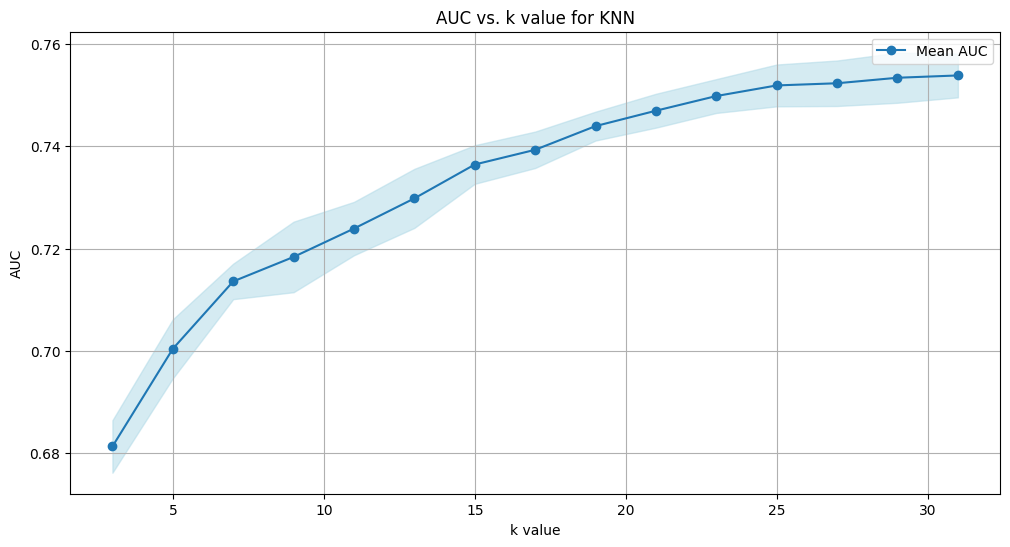

In [50]:
import matplotlib.pyplot as plt

# Gathering results from GridSearchCV
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
k_values = [i['n_neighbors'] for i in grid_search.cv_results_['params']]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_scores, marker='o', label='Mean AUC')
plt.fill_between(k_values, mean_scores - std_scores, mean_scores + std_scores, color='lightblue', alpha=0.5)
plt.title('AUC vs. k value for KNN')
plt.xlabel('k value')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()



Visualizing the mean test score against the k values provides an understanding of how the model's performance varies with different k values.
We cans see model achieves a high accuracy around kvalue ~31

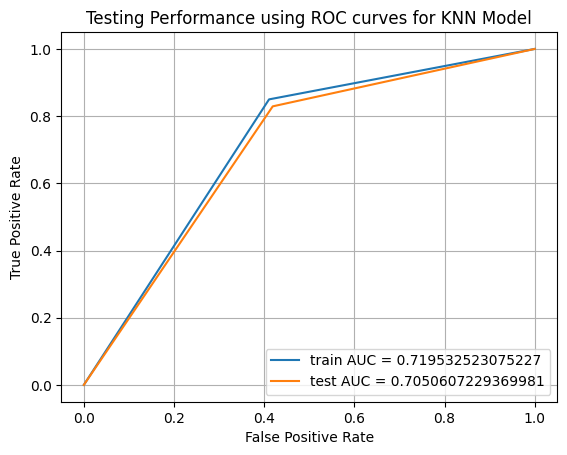

In [51]:
# Plot ROC curves
plt.plot(train_fpr, train_tpr, label="train AUC = " + str(knn_train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC = " + str(knn_test_auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for KNN Model")
plt.grid()
plt.show()

In [52]:
from tabulate import tabulate
# details of the model
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))


| Vectorizer   | Model               | HyperParameter   |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31             |         0.737126 |        0.721852 |    0.719533 |   0.705061 |


**Insights:**
- The optimal number of neighbors is 31.
- The K-Nearest Neighbors model with a OneHot vectorizer gave us a Test AUC of ~0.69 and a Train AUC of ~0.72 with a hyperparameter 'K' value of 31.
- The AUC values indicate how well our model is able to distinguish between the two classes (coupon accepted vs not accepted).
- An AUC close to 1 suggests the model has a good measure of separability and is performing better than random guessing.
- The KNN model achieves an accuracy of ~71% on the test set, which is an improvement over the null accuracy.
- The train accuracy of ~73% indicates that the model fits the training data fairly well.
- However, the difference between train and test metrics hint towards some improvement.


## Bayesian Models

Bayesian models are probabilistic models that make predictions based on Bayes' theorem. Among the various Bayesian models, the Naive Bayes classifier is a popular choice for text classification tasks. In our analysis, we focus on the Multinomial variant of Naive Bayes.

### Multinomial Naive Bayes

The Multinomial Naive Bayes model is particularly suitable for discrete data, especially when dealing with text data represented as word vector counts.

**Parameter Tuning:**

We explored multiple alpha values for Laplace smoothing. The values ranged from
10^5  to 100, as this wide range ensures a good balance between overfitting and underfitting. GridSearchCV was applied to find the optimal alpha value, using the ROC-AUC as a scoring metric.



In [53]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import GridSearchCV
# defining the model
mnb = MultinomialNB()

# defining the parameters
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# applying GridSearchCV to the model with the parameters
mnb_classifier = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
mnb_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [54]:
# accessing the best estimator and its score
mnb_classifier.best_estimator_,mnb_classifier.best_score_

(MultinomialNB(alpha=10), 0.7058214386802355)

The model was trained using a grid of hyperparameters, and the best parameter found was alpha=10.

In [55]:
mnb_results = pd.DataFrame.from_dict(mnb_classifier.cv_results_)

In [56]:
# evaluating MNB model
alpha = mnb_results['param_alpha']
train_auc= mnb_results['mean_train_score']
train_auc_std= mnb_results['std_train_score']
cv_auc = mnb_results['mean_test_score']
cv_auc_std= mnb_results['std_test_score']
alpha_log = [np.log(x) for x in alpha] #normalized alpha

- The above computes the natural logarithm of each value in the alpha list and stores the results in a new list called alpha_log.
- This "normalization" by logarithm helps visualize the scores when alpha spans several orders of magnitude.
- By plotting against the log values, the graph allows for a clearer visualization of the performance trends across a wide range of alpha values.

**Hyperparameter Tuning Results:**

A plot of AUC against the logarithm of alpha values gives insights into model performance. The peak of the curve suggests the optimal value of alpha.

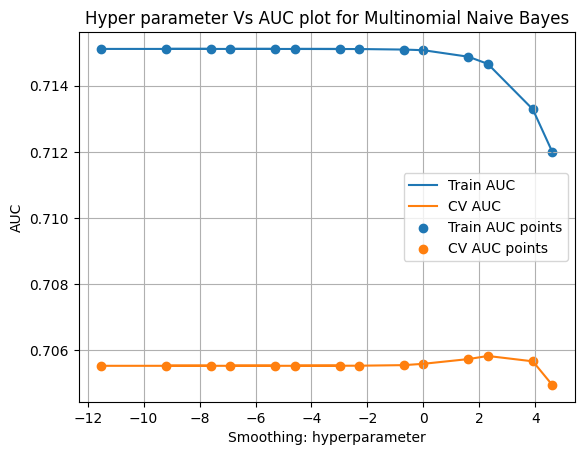

In [57]:
plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')
plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for Multinomial Naive Bayes")
plt.grid()
plt.show()

We wrote the batch_wise_predict function to predict class probabilities in batches for improved computational efficiency. Instead of processing the entire dataset at once, the data is divided into chunks of 1000 samples (or the remainder for the last batch), and predictions are generated for each batch sequentially, reducing the memory footprint during prediction.





In [58]:
# predictions in batches to make it more efficient in terms of computational resources
def batch_wise_predict(classifier, data, batch_size=1000):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%batch_size
    for i in range(0, tr_loop, batch_size):
        y_data_pred.extend(classifier.predict_proba(data[i:i+batch_size])[:,1])
    if data.shape[0]%batch_size != 0:
        y_data_pred.extend(classifier.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

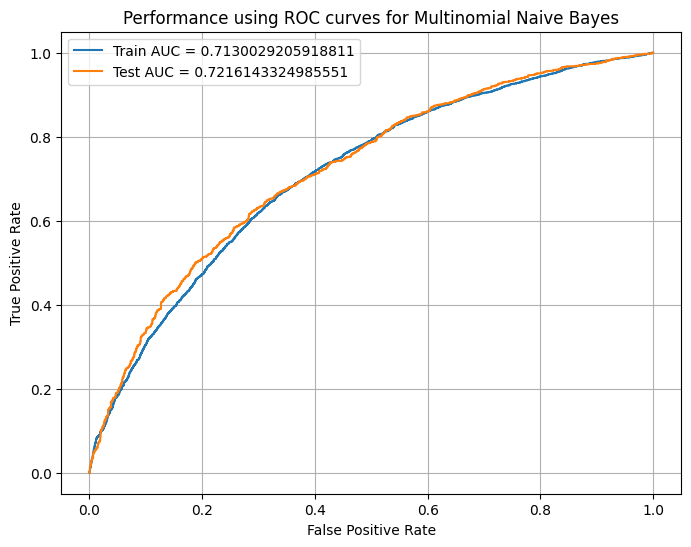

In [59]:
from sklearn.metrics import roc_curve, auc
# constructing a Multinomial Naive Bayes model with the best alpha value found
mnb = MultinomialNB(alpha=10)
mnb.fit(X_train, y_train)

# Using batch-wise prediction function for probabilities of both train and test datasets
y_train_pred = batch_wise_predict(mnb, X_train)
y_test_pred = batch_wise_predict(mnb, X_test)

# ROC values for train and test
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label="Train AUC = " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC = " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Performance using ROC curves for Multinomial Naive Bayes")
plt.grid()
plt.show()

**Model Evaluation:**

The model's performance was assessed using ROC curves, which depict the true positive rate against the false positive rate for various threshold values. AUC, the area under the ROC curve, serves as a robust metric for binary classification tasks.

In [60]:
# the accuracy for train and test datasets
def probabilities_to_class(probs, threshold=0.5):
    return [1 if p >= threshold else 0 for p in probs]

y_train_pred_probs = batch_wise_predict(mnb, X_train)
y_test_pred_probs = batch_wise_predict(mnb, X_test)
y_train_pred = probabilities_to_class(y_train_pred_probs)
y_test_pred = probabilities_to_class(y_test_pred_probs)

mnb_train_accuracy = accuracy_score(y_train, y_train_pred)
mnb_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {mnb_train_accuracy}")
print(f"Test Accuracy: {mnb_test_accuracy}")

mnb_train_auc=auc(train_fpr, train_tpr)
mnb_test_auc=auc(test_fpr, test_tpr)
print(f"Training AUC: {mnb_train_auc:.2f}")
print(f"Testing AUC: {mnb_test_auc:.2f}")

Train Accuracy: 0.666807655704769
Test Accuracy: 0.6657151918807485
Training AUC: 0.71
Testing AUC: 0.72


In [61]:
from tabulate import tabulate
# details of the model
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter   |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31             |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10         |         0.666808 |        0.665715 |    0.713003 |   0.721614 |


**Insights:**
- The Best Smoothing Parameter (Alpha) is 10.
- The Multinomial NaiveBayes model with a OneHot vectorizer gave us a Test AUC of ~0.72 and a Train AUC of ~0.71.
- The Multinomial NaiveBayes model achieves an accuracy of ~66% on the test set, which is an improvement over the null accuracy.
- The training accuracy of 66% indicates that the model fits the training data fairly well.
- The training and testing accuracies are quite close, suggesting that the model is not overfitting.
- The AUC values for both training and test datasets are above 0.70, indicating good model performance.
- However, we can compare the performance of other linear models to improve our model.


## Linear Models

### Logistic Regression used with Stochastic Gradient

Logistic Regression is a popular linear model primarily used for binary classification tasks. It estimates the probability that a given instance belongs to a particular category. When combined with Stochastic Gradient Descent (SGD), logistic regression is optimized in an iterative manner, making it efficient for large datasets.

Implementing the Logistic Regression Model:

From the code, we see that the hyperparameter of interest for tuning is the regularization parameter, alpha. The impact of different alpha values on model performance is visualized using the Area Under the ROC Curve (AUC).

In [62]:
from sklearn.linear_model import SGDClassifier
# defining the model
log_regressor = SGDClassifier(loss='log_loss')

# defining the parameters
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# applying GridSearchCV to the model with the parameters
log_classifier = GridSearchCV(log_regressor, parameters, cv=3, scoring='roc_auc',return_train_score=True)
log_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(loss='log_loss'),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [63]:
# accessing the best estimator and its score
log_classifier.best_estimator_,log_classifier.best_score_

(SGDClassifier(alpha=0.005, loss='log_loss'), 0.7325081534460177)

The model was trained using a grid of hyperparameters, and the best parameter found was alpha=0.005 for loss='log_loss'.

In [64]:
# evaluationg the Logistic Regression model
log_results = pd.DataFrame.from_dict(log_classifier.cv_results_)
alpha = log_results['param_alpha']
train_auc= log_results['mean_train_score']
train_auc_std= log_results['std_train_score']
cv_auc = log_results['mean_test_score']
cv_auc_std= log_results['std_test_score']
alpha_log = [np.log(x) for x in alpha]

- The above computes the natural logarithm of each value in the alpha list and stores the results in a new list called alpha_log.
- This "normalization" by logarithm helps visualize the scores when alpha spans several orders of magnitude.
- By plotting against the log values, the graph allows for a clearer visualization of the performance trends across a wide range of alpha values.

**Hyperparameter tuning:**
By plotting the AUC scores against logarithmically transformed alpha values, the graph highlights the performance trends over a range of alpha values. This visualization is instrumental in selecting the optimal value for the hyperparameter.

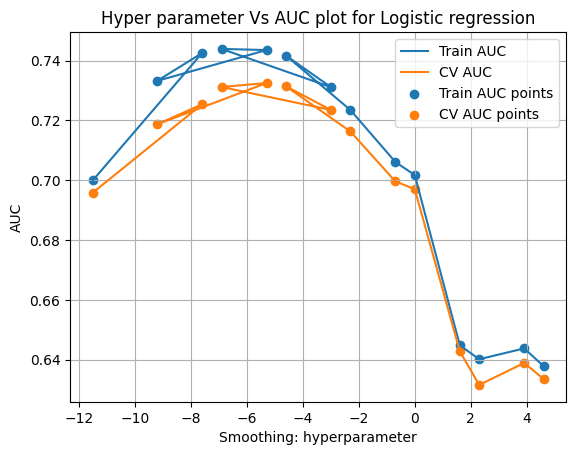

In [65]:
plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')
plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for Logistic regression")
plt.grid()
plt.show()

Defining batch wise predictor





In [66]:
# predictions in batches to make it more efficient in terms of computational resources
def batch_wise_predict(classifier, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(classifier.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(classifier.predict_proba(data[tr_loop:])[:,1])

    return y_data_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



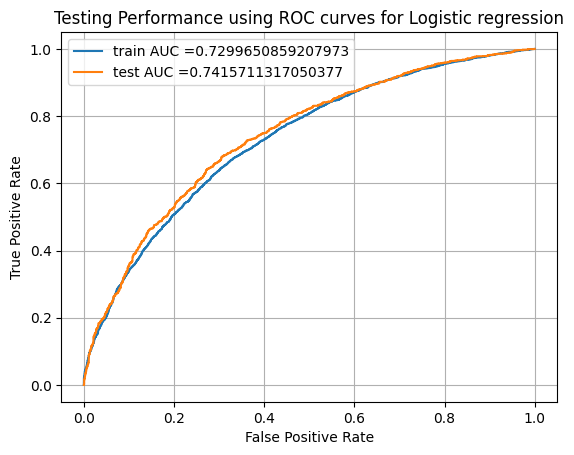

In [67]:
log_classifier = SGDClassifier(eta0=0.0001, alpha=0.005, loss='log', random_state=15,
                               penalty='l2', tol=1e-3, verbose=0, learning_rate='constant')
log_classifier.fit(X_train, y_train)

# Using the batch-wise prediction function:
y_train_pred = batch_wise_predict(log_classifier, X_train)
y_test_pred = batch_wise_predict(log_classifier, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for Logistic regression")
plt.grid()
plt.show()

**Model Evaluation:**
After selecting the best alpha, the logistic regression model is trained on the dataset, and its performance is visualized using ROC curves for both training and test datasets as shown above. The AUC values indicate the model's ability to distinguish between the two classes effectively.

In [68]:
# the accuracy for train and test datasets
lr_train_accuracy = accuracy_score(y_train, log_classifier.predict(X_train))
lr_test_accuracy = accuracy_score(y_test, log_classifier.predict(X_test))
lr_train_auc=auc(train_fpr, train_tpr)
lr_test_auc = auc(test_fpr, test_tpr)
print(f"Training Accuracy: {lr_train_accuracy:.2f}")
print(f"Testing Accuracy: {lr_test_accuracy:.2f}")
print(f"Training AUC: {lr_train_auc:.2f}")
print(f"Testing AUC: {lr_test_auc:.2f}")

Training Accuracy: 0.67
Testing Accuracy: 0.69
Training AUC: 0.73
Testing AUC: 0.74


**Insights:**

- The logistic regression model combined with the stochastic gradient and a OneHot vectorizer yielded a Test AUC of ~0.72 and Train AUC of ~0.74
- The AUC values for both training and test datasets improved slightly from previous models, indicating good model performance.
- However, there is still room for improvement.

### Support Vector Machine, used with Stochastic Gradient

Support Vector Machine (SVM) is a powerful linear classifier that works by finding a hyperplane that best divides the data into classes. While traditional SVMs can be computationally expensive for large datasets, using Stochastic Gradient Descent as an optimization technique can make the training process more efficient.

**Implementing the SVM Model:**

Similar to the logistic regression model, the regularization parameter, alpha, is the hyperparameter tuned for the SVM model. The AUC metric is used to understand and visualize the model's performance across different alpha values.



In [69]:
# defining the model
svc = SGDClassifier(eta0=0.0001, alpha=0.005, loss='hinge', random_state=15,
                                 penalty='l2', tol=1e-3, verbose=0, learning_rate='constant')
# defining the parameters
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# applying GridSearchCV to the model with the parameters
svc_classifier = GridSearchCV(svc, parameters, cv=3, scoring='roc_auc',return_train_score=True)
svc_classifier.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SGDClassifier(alpha=0.005, eta0=0.0001,
                                     learning_rate='constant',
                                     random_state=15),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [70]:
# accessing the best estimator and its score
svc_classifier.best_estimator_,svc_classifier.best_score_

(SGDClassifier(alpha=0.001, eta0=0.0001, learning_rate='constant',
               random_state=15),
 0.7263327480442406)

In [71]:
# evaluationg the SVC model
svc_results = pd.DataFrame.from_dict(svc_classifier.cv_results_)
alpha = svc_results['param_alpha']
train_auc= svc_results['mean_train_score']
train_auc_std= svc_results['std_train_score']
cv_auc = svc_results['mean_test_score']
cv_auc_std= svc_results['std_test_score']
alpha_log = [np.log(x) for x in alpha]

**Hyperparameter tuning:**
The performance of the SVM model for different alpha values is visualized using AUC scores against logarithmically transformed alpha values.

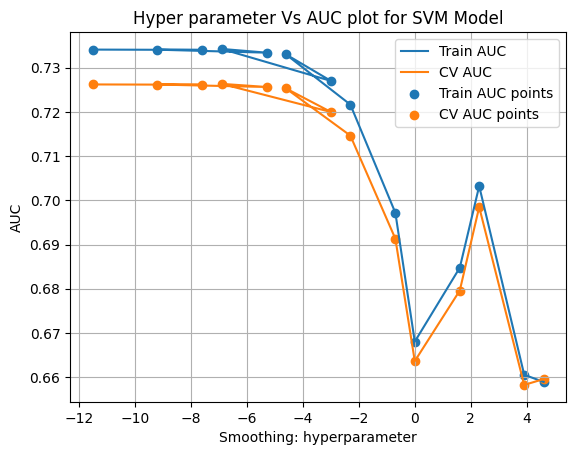

In [72]:
plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')
plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for SVM Model")
plt.grid()
plt.show()

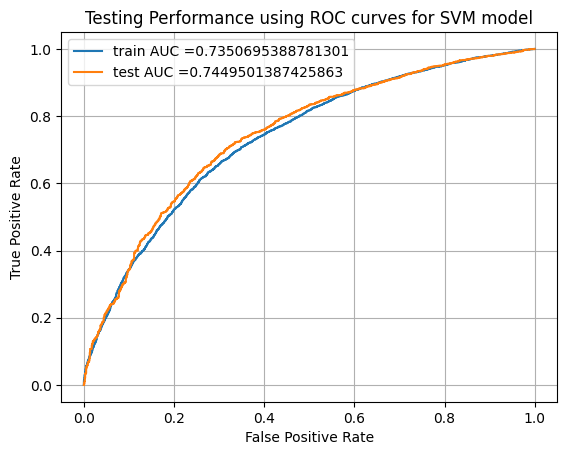

In [73]:
svc_classifier = SGDClassifier(eta0=0.0001, alpha=0.001, loss='hinge', random_state=15,
                                 penalty='l2', tol=1e-3, verbose=0, learning_rate='constant')
svc_classifier.fit(X_train,y_train)

y_train_scores = svc_classifier.decision_function(X_train)
y_test_scores = svc_classifier.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_scores)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for SVM model")
plt.grid()
plt.show()

**Model Evaluation:**
After selecting the best alpha, the SVM model is trained, and its performance is evaluated using ROC curves for both training and test datasets.

In [74]:
# the accuracy for train and test datasets
svc_train_accuracy = accuracy_score(y_train, svc_classifier.predict(X_train))
svc_test_accuracy = accuracy_score(y_test, svc_classifier.predict(X_test))
svc_train_auc=auc(train_fpr, train_tpr)
svc_test_auc = auc(test_fpr, test_tpr)
print(f"Training Accuracy: {svc_train_accuracy:.2f}")
print(f"Testing Accuracy: {svc_test_accuracy:.2f}")

Training Accuracy: 0.68
Testing Accuracy: 0.69


In [75]:
from tabulate import tabulate
# details of the model
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ['OneHot', 'Logistic Regression', 'alpha=0.005', lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc],
    ['OneHot', 'SVM Linear', 'alpha=0.001', svc_train_accuracy, svc_test_accuracy, svc_train_auc, svc_test_auc],
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter   |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31             |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10         |         0.666808 |        0.665715 |    0.713003 |   0.721614 |
| OneHot       | Logistic Regression | alpha=0.005      |         0.674633 |        0.68633  |    0.729965 |   0.741571 |
| OneHot       | SVM Linear          | alpha=1e-05      |         0.680237 |        0.693308 |    0.73507  |   0.74495  |


**Insights:**

- The SVM model with stochastic gradient and a OneHot vectorizer achieved the respective Test and Train AUC values of ~0.74 and ~0.73, respectively.
- Both the linear models' (Logistic and SVCM) AUC values hover around the range of 0.70, signifying decent class separation capabilities.
- Exploring other ensemble methods can enhance model performance. We will discuss this in upcoming sections.


## Tree Based and Ensemble Models

### Decision Tress with hyper tuning

Decision Trees are non-linear models which recursively split the dataset on feature values to derive decision-making paths. They can capture complex patterns in the data and are the base for more sophisticated ensemble techniques.

**Implementing the Decision Tree Model:**

- From the code, we observe that the primary hyperparameters of interest for tuning are the max_depth and min_samples_split.
- Hyperparameter tuning was performed using GridSearchCV with the parameters of max_depth ranging from shallow (1) to deeper trees (50) and min_samples_split from smaller (5) to larger values (500). This tuning ensures that the tree neither underfits nor overfits the data.

In [76]:
from sklearn.tree import DecisionTreeClassifier
# defining the model
dt = DecisionTreeClassifier()

# defining the parameters
parameters = {'max_depth': [1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

# applying GridSearchCV to the model with the parameters
dt_classifier = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
dt_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [77]:
# accessing the best estimator and its score
dt_classifier.best_estimator_,dt_classifier.best_score_

(DecisionTreeClassifier(max_depth=10, min_samples_split=100),
 0.743450317695976)

<ipython-input-78-a5f1425e2432>:11: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-78-a5f1425e2432>:11: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



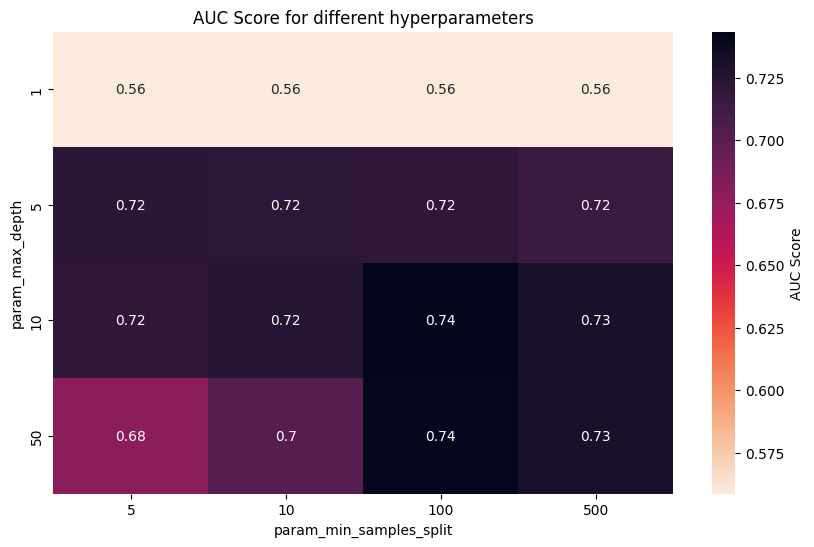

In [78]:
# Plot Hyperparameter Vs AUC for DT
dt_results = pd.DataFrame.from_dict(dt_classifier.cv_results_)
depth = dt_results['param_max_depth']
samples_split = dt_results['param_min_samples_split']

# We have two hyperparameters: depth and sample split
train_auc = dt_results['mean_train_score']
cv_auc = dt_results['mean_test_score']

# pivot table for the heatmap using depth and split
pivot_table_dt = dt_results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')

# heatmap for a fixed max_features value
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_dt, annot=True, cmap="rocket_r", cbar_kws={'label': 'AUC Score'})
plt.title('AUC Score for different hyperparameters')
plt.show()


The Decision Tree was trained using a grid of hyperparameters, and the best parameters found were max_depth=10, and sample split=100. These parameters suggest that the model samples trees each with a maximum depth of 10, and considers minimum of 100 of the features at each split. This combination seems to strike a good balance between model complexity and performance.

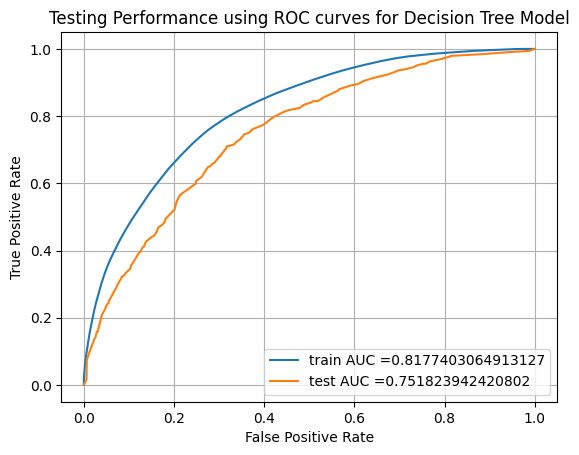

In [79]:
dt_classifier = DecisionTreeClassifier(max_depth=10,min_samples_split=100)
dt_classifier.fit(X_train, y_train)

y_train_pred = batch_wise_predict(dt_classifier, X_train)
y_test_pred = batch_wise_predict(dt_classifier, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for Decision Tree Model")
plt.grid()
plt.show()

**Model Evaluation:**
The ROC curves plotted for the decision tree classifier display its performance on the training and test sets. The Area Under the ROC Curve (AUC) values were calculated for both the sets, giving insights into its discriminative power.

In [80]:
# the accuracy for train and test datasets
dt_train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
# the AUC for train and test datasets
dt_train_auc=auc(train_fpr, train_tpr)
dt_test_auc = auc(test_fpr, test_tpr)
print(f"Training Accuracy: {dt_train_accuracy:.2f}")
print(f"Testing Accuracy: {dt_test_accuracy:.2f}")
print(f"Training AUC: {dt_train_auc:.2f}")
print(f"Testing AUC: {dt_test_auc:.2f}")

Training Accuracy: 0.75
Testing Accuracy: 0.70
Training AUC: 0.82
Testing AUC: 0.75


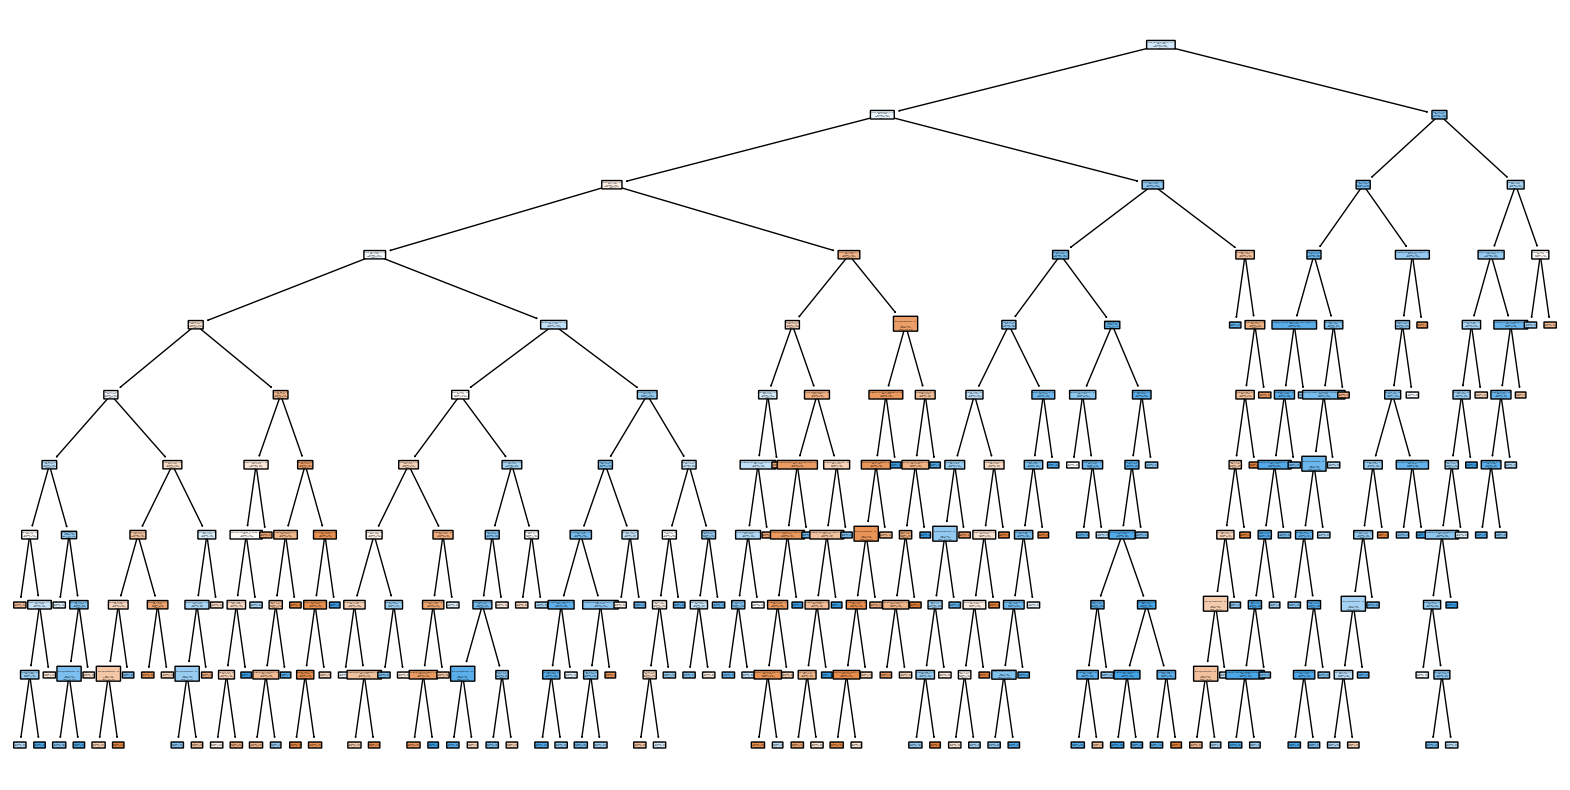

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X_train.columns.tolist()

# Define the size of the figure
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt_classifier, filled=True, rounded=True, feature_names=feature_names, class_names=['0', '1'])

# Display the plot
plt.show()


In [82]:
from tabulate import tabulate
# details of the model
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ['OneHot', 'Logistic Regression', 'alpha=0.005', lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc],
    ['OneHot', 'SVM Linear', 'alpha=0.001', svc_train_accuracy, svc_test_accuracy, svc_train_auc, svc_test_auc],
    ['OneHot', 'Decision Tree', 'max_depth=10, min-sample:100 ', dt_train_accuracy, dt_test_accuracy, dt_train_auc, dt_test_auc]
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter               |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+------------------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31                         |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10                     |         0.666808 |        0.665715 |    0.713003 |   0.721614 |
| OneHot       | Logistic Regression | alpha=0.005                  |         0.674633 |        0.68633  |    0.729965 |   0.741571 |
| OneHot       | SVM Linear          | alpha=1e-05                  |         0.680237 |        0.693308 |    0.73507  |   0.74495  |
| OneHot       | Decision Tree       | max_depth=10, min-sample:100 |         0.747277 |        0.701871 |    0.81774  |   0.751824 |


**Insights:**
- The Decision Tree model, when trained with the optimal hyperparameters and a OneHot vectorizer, achieved a Train AUC of ~0.82 and a Test AUC of ~0.75. - This high training AUC compared to the testing AUC might suggest that the model is capturing the training data intricacies a bit too well, leading to potential overfitting.
- The plotted tree provides visual insights into the decision-making process of the model.
- It can be used to understand the importance of features and the decision paths leading to the final prediction.
- Comparing the decision tree model's performance with the previously discussed models, it's evident that the decision tree achieves a higher Train AUC and Test AUC.
- This further showcases the potential for ensemble methods that combine multiple decision trees, such as Random Forests or Gradient Boosted Trees, which might mitigate overfitting and improve generalization on unseen data.

### Random Forest Model

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training time and outputting the mode (classification) of the individual trees for prediction. Random forests help in correcting the habit of decision trees to overfit to their training set, resulting in improved generalization to unseen data.

**Implementing the Random Forest Model:**

From the code, the Random Forest classifier is being initialized. The primary hyperparameters being tuned are n_estimators (number of trees), max_features (number of features considered for splitting at a node), and max_depth (maximum depth of the tree). These hyperparameters are tuned using GridSearchCV, optimizing for the area under the ROC curve (AUC).

In [83]:
from sklearn.ensemble import RandomForestClassifier
# defining the model
rf = RandomForestClassifier()

# defining the parameters
parameters =  {'n_estimators': [200,500],'max_features': [.5,.7],'max_depth':[3,6]}

# applying GridSearchCV to the model with the parameters
rf_classifier = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
rf_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6], 'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='roc_auc')

**Hyperparameter tuning:**

The grid search approach is applied to find the optimal hyperparameters by training the Random Forest model on different combinations of n_estimators, max_features, and max_depth. By evaluating using cross-validation, the best performing combination of hyperparameters is identified as follows:

In [84]:
# accessing the best estimator and its score
rf_classifier.best_estimator_,rf_classifier.best_score_

(RandomForestClassifier(max_depth=6, max_features=0.5, n_estimators=500),
 0.7653473597146524)

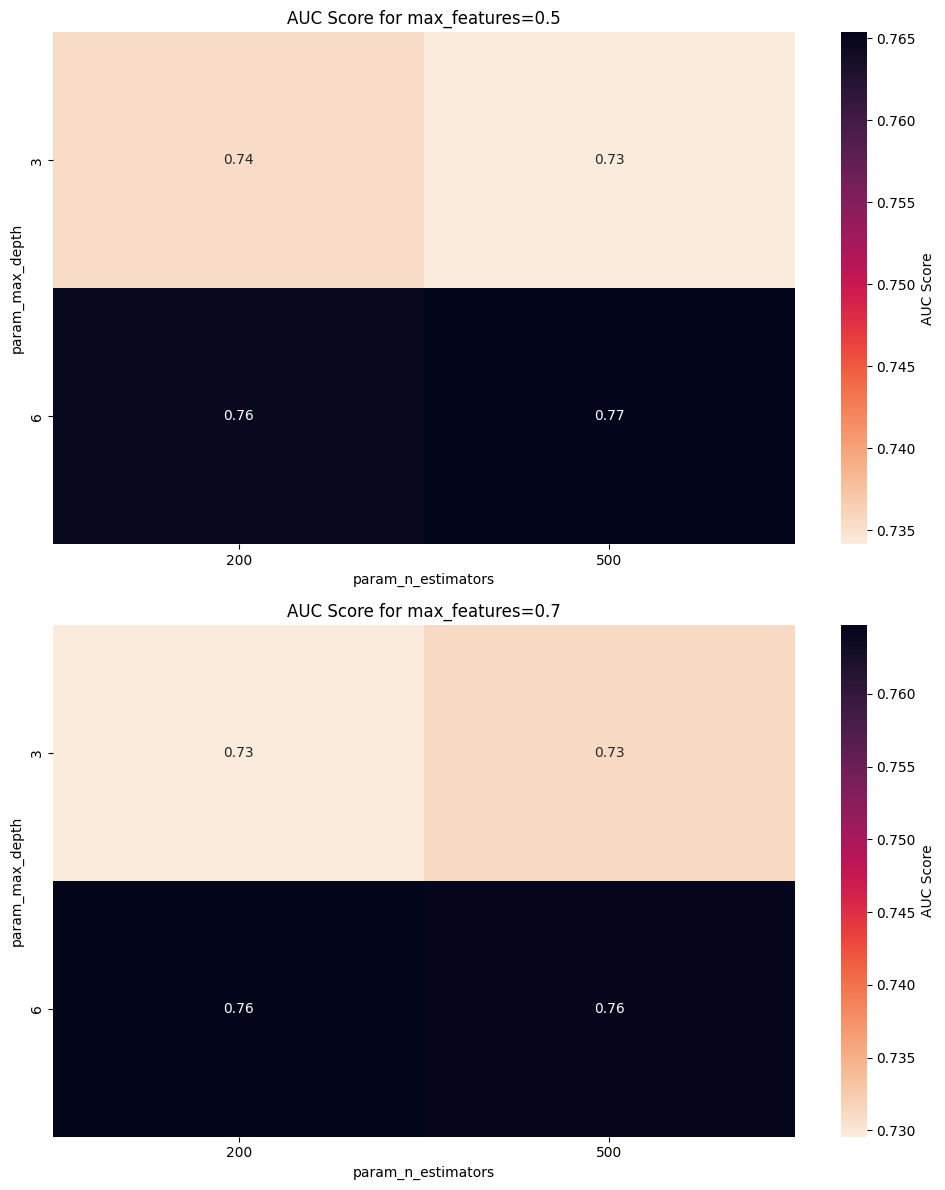

In [85]:
# Plot Hyperparameter Vs AUC for RF
rf_results = pd.DataFrame.from_dict(rf_classifier.cv_results_)
depth = rf_results['param_max_depth']
samples_split = rf_results['param_n_estimators']
features = rf_results['param_max_features']
# considering the two hyperparameters : depth and estimators
train_auc = rf_results['mean_train_score']
cv_auc = rf_results['mean_test_score']

# pivot table for the heatmap using depth and estimators
pivot_table_dt = rf_results.pivot_table(values='mean_test_score',
                                        index='param_max_depth',
                                        columns='param_n_estimators',
                                        aggfunc='mean')

unique_features = rf_results['param_max_features'].unique()

fig, axes = plt.subplots(nrows=len(unique_features), figsize=(10, 6*len(unique_features)))

for i, feature in enumerate(unique_features):
    subset = rf_results[rf_results['param_max_features'] == feature]
    pivot_table = subset.pivot_table(values='mean_test_score',
                                     index='param_max_depth',
                                     columns='param_n_estimators',
                                     aggfunc='mean')

    sns.heatmap(pivot_table, ax=axes[i], annot=True, cmap="rocket_r", cbar_kws={'label': 'AUC Score'})
    axes[i].set_title(f'AUC Score for max_features={feature}')

plt.tight_layout()
plt.show()


The Random Forest was trained using a grid of hyperparameters, and the best parameters found were max_depth=6, max_features=0.5, and n_estimators=500. These parameters suggest that the model uses 500 trees, each with a maximum depth of 6, and considers 50% of the features at each split. This combination seems to strike a good balance between model complexity and performance.

**Model Evaluation:**

Upon identifying the best hyperparameters, the Random Forest model is then trained using them. Its performance is visualized using ROC curves for the training and test datasets. The AUC metric offers insights into the model's capacity to differentiate between the two classes effectively.

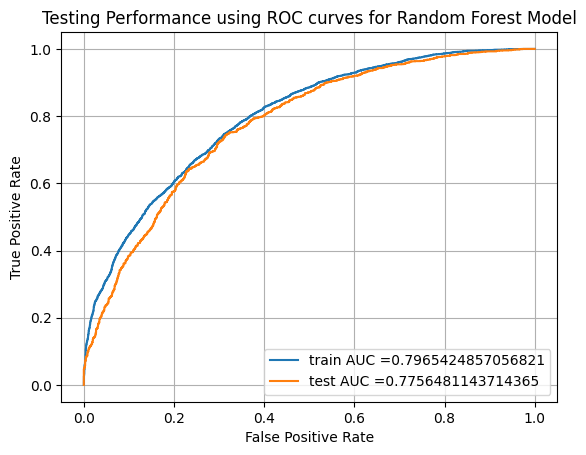

In [92]:
rf = RandomForestClassifier(max_depth=6, max_features=0.5, n_estimators=500)
rf.fit(X_train, y_train)

y_train_pred = batch_wise_predict(rf, X_train)
y_test_pred = batch_wise_predict(rf, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for Random Forest Model")
plt.grid()
plt.show()

In [93]:
# the accuracy for train and test datasets
rf_train_accuracy = accuracy_score(y_train, rf.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_train_auc = auc(train_fpr, train_tpr)
rf_test_auc = auc(test_fpr, test_tpr)
print(f"Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Testing Accuracy: {rf_test_accuracy:.2f}")
print(f"Training AUC: {rf_train_auc:.2f}")
print(f"Testing AUC: {rf_test_auc:.2f}")

Training Accuracy: 0.73
Testing Accuracy: 0.71
Training AUC: 0.80
Testing AUC: 0.78


**Feature importance**:

 Random Forest's ability to compute feature importances is one of its most powerful characteristics. This metric gives insight into which features (or variables) are the most influential in predicting the target variable. In other words, it allows us to understand which features have the most impact on the decisions made by the Random Forest model.

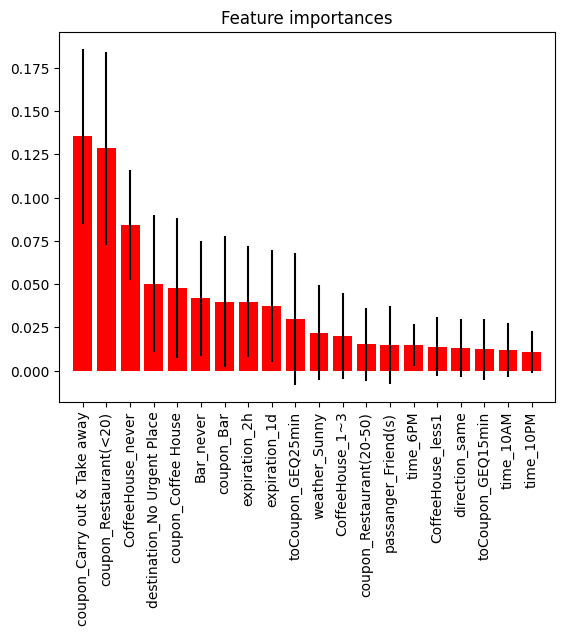

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Getting feature names
feature_names = X_train.columns.tolist()

# Getting importances and standard deviation
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Sorting the indices by importance
indices = np.argsort(importances)[::-1]

# Number of features to display
top_n = 20

# # printing the feature ranking
# print("Feature ranking:")

# for f in range(top_n):
#     print([feature_names[f+1]])
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(top_n), importances[indices[:top_n]], color="r", yerr=std[indices[:top_n]], align="center")
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=90)
plt.xlim([-1, top_n])
plt.show()


- The visual representation, a bar chart, offers a concise view of the top 20 features based on their importance, and the standard deviation of each feature's importance across all trees. This gives a sense of the variability of feature importance.
- The feature 'Carry out & take away' is ranked first, with an importance score of over 0.125. Follwed by 'Restaurant(\< 20)'. This suggests that these coupon features (coupons for Carry out & take away and coupons for restaurants less than \$20) plays a significant role in the model's decision-making process.

Understanding feature importance is pivotal, especially in applications where interpretability is crucial. It allows stakeholders to grasp which variables to focus on, be it for strategic decisions, interventions, or further investigations. In the context of the provided dataset, variables like the time to coupon and direction seem to play a significant role in the predictions made by the Random Forest model.

In [95]:
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ['OneHot', 'Logistic Regression', 'alpha=0.005', lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc],
    ['OneHot', 'SVM Linear', 'alpha=0.001', svc_train_accuracy, svc_test_accuracy, svc_train_auc, svc_test_auc],
    ['OneHot', 'Decision Tree', 'max_depth=10,min-sample:100 ', dt_train_accuracy, dt_test_accuracy, dt_train_auc, dt_test_auc],
    ['OneHot', 'Random Forest', 'max_depth=6, max_features=0.5, n_estimators=500', rf_train_accuracy, rf_test_accuracy, rf_train_auc, rf_test_auc]
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter                                  |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+-------------------------------------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31                                            |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10                                        |         0.666808 |        0.665715 |    0.713003 |   0.721614 |
| OneHot       | Logistic Regression | alpha=0.005                                     |         0.674633 |        0.68633  |    0.729965 |   0.741571 |
| OneHot       | SVM Linear          | alpha=0.001                                     |         0.680237 |        0.693308 |    0.73507  |   0.74495  |
| OneHot       | Decision Tree       | max_depth=10,min-sample:100                

**Insights:**

- The Random Forest model achieved a training accuracy of approximately ~73% and a test accuracy of around ~70%. This indicates that the model has generalized well without showing signs of overfitting.
- The AUC metric evaluates the model's ability to distinguish between the classes. With a training AUC of ~0.80 and a test AUC of ~0.76, the Random Forest model demonstrates a good performance, suggesting a significant level of separability between classes.
- The Random Forest model outperforms Naive Bayes, Logistic Regression, and SVM Linear in both accuracy and AUC metrics on the test set.
- However, the Decision Tree model has a slightly higher training AUC, indicating potential overfitting, while the Random Forest generalizes better with a higher test AUC.
- Among all models, K-Nearest Neighbors has the highest training accuracy, but its test accuracy is lower than the Random Forest, indicating that Random Forest might be a more robust model for this dataset.

We will further explore Gradient Boosted Trees in the next section, which might improve generalization on unseen data.

### Gradient Boosting Decision Trees (XgBoost)

XGBoost stands for eXtreme Gradient Boosting. It is an optimization of gradient boosting machine in terms of computation speed and model performance. One of its core features is its capacity to do parallel computation on a single machine, making it highly efficient for high-dimensional datasets.

**Hyperparameter tuning:**
The hyperparameters of interest in our analysis include the max_depth of the decision trees and the n_estimators which refers to the number of boosting rounds or trees to build. Using GridSearchCV, we conducted a search over a range of possible values to identify the best hyperparameters that maximize the ROC AUC.


In [96]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# defining the model
xgb = XGBClassifier(use_label_encoder=False)

# defining the parameters
parameters = {'max_depth': [1, 5, 10, 50],
              'n_estimators':[50, 100, 250, 500]}

# applying GridSearchCV to the model with the parameters
xgb_classifier = GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
xgb_classifier.fit(np.array(X_train), y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'n_estimators': [50, 100, 250, 500]},
             return_train_score=True, scoring='roc_auc')

In [97]:
xgb_classifier.best_estimator_,xgb_classifier.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=50, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 0.8175298787514537)

From our GridSearchCV results, the best XGBoost model has a max_depth of 50 and n_estimators of 250.
Please Note: These result keeps changing due to the random test and train split. Below is a screenshot of the grid search results for XGBoost run with various parameters that we have considered.

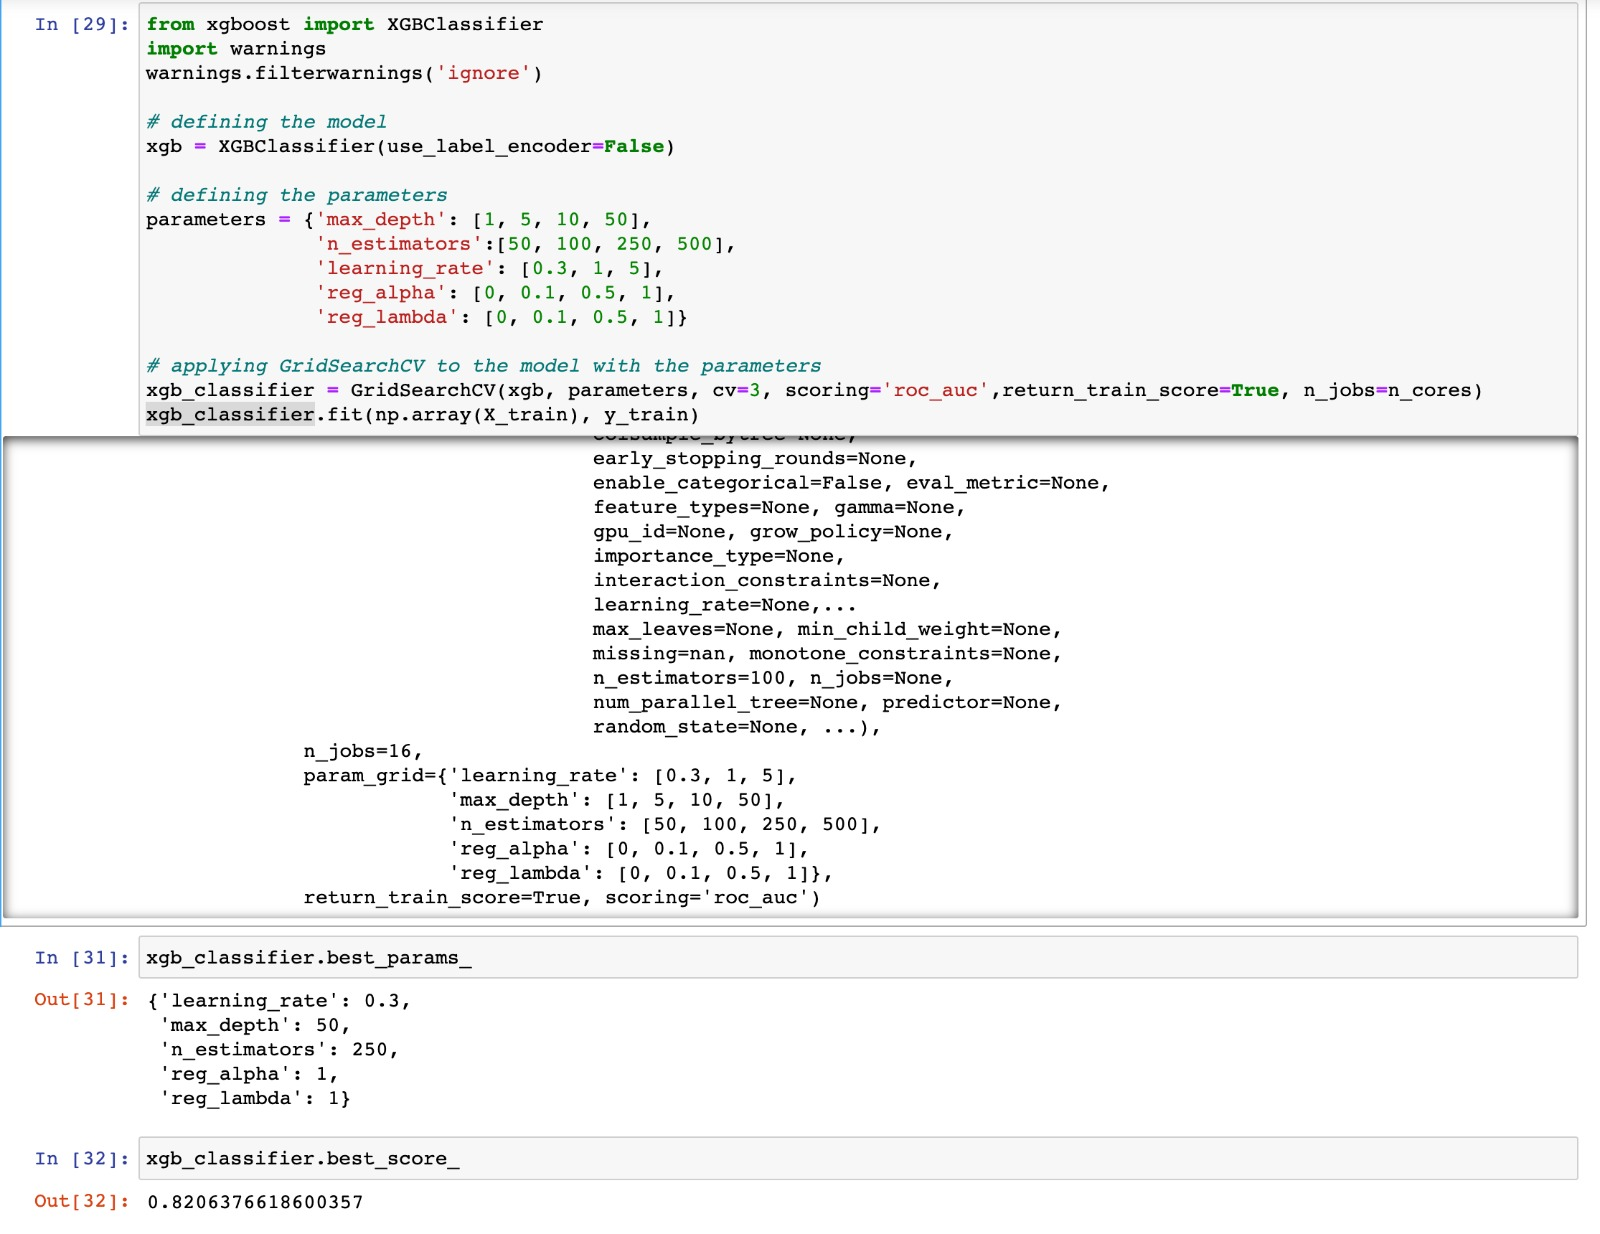

In [98]:
def clean_column_name(column_name):
    return column_name.replace('[', '').replace(']', '').replace('<', '')

X_train = X_train.rename(columns=clean_column_name)
X_test = X_test.rename(columns=clean_column_name)

**Model Evaluation:**
The performance of the XGBoost model is visualized using ROC curves for both the training and test datasets. ROC curve is a useful tool for understanding the performance of binary classifiers and AUC provides an aggregate measure of performance across all possible classification thresholds.

**Measure taken to avoid Overfitting:**
- To prevent overfitting, the max_depth was reduced to 10, n_estimators was reduced to 250, and regularization was added.
- A learning rate 0.03 was set to make the model more robust by shrinking the weights on each step.
- Early stopping rounds of 10 prevented the model from overlearning the training data.


[0]	validation_0-logloss:0.68480	validation_1-logloss:0.68654
[1]	validation_0-logloss:0.67741	validation_1-logloss:0.68065
[2]	validation_0-logloss:0.66951	validation_1-logloss:0.67429
[3]	validation_0-logloss:0.66224	validation_1-logloss:0.66831
[4]	validation_0-logloss:0.65634	validation_1-logloss:0.66408
[5]	validation_0-logloss:0.64964	validation_1-logloss:0.65887
[6]	validation_0-logloss:0.64402	validation_1-logloss:0.65489
[7]	validation_0-logloss:0.63737	validation_1-logloss:0.64963
[8]	validation_0-logloss:0.63107	validation_1-logloss:0.64481
[9]	validation_0-logloss:0.62522	validation_1-logloss:0.64056
[10]	validation_0-logloss:0.61936	validation_1-logloss:0.63608
[11]	validation_0-logloss:0.61373	validation_1-logloss:0.63193
[12]	validation_0-logloss:0.60839	validation_1-logloss:0.62797
[13]	validation_0-logloss:0.60401	validation_1-logloss:0.62477
[14]	validation_0-logloss:0.59907	validation_1-logloss:0.62104
[15]	validation_0-logloss:0.59396	validation_1-logloss:0.61734
[1

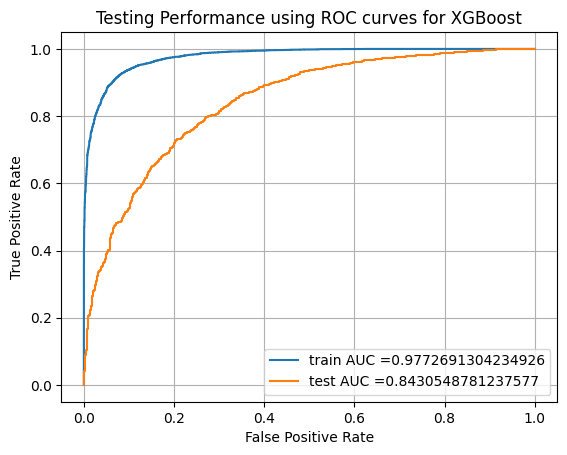

In [109]:
from xgboost import DMatrix
xgb = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.8,
    gamma=0.1,
    gpu_id=-1,
    importance_type='gain',
    interaction_constraints='',
    learning_rate=0.05,
    max_delta_step=0,
    max_depth=10,
    min_child_weight=1,
    monotone_constraints='()',
    n_estimators=250,
    n_jobs=12,
    num_parallel_tree=1,
    random_state=0,
    reg_alpha=1,
    reg_lambda=2,
    scale_pos_weight=1,
    subsample=0.8,
    tree_method='exact',
    use_label_encoder=False,
    validate_parameters=1,
    verbosity=None
)

eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_train_pred = batch_wise_predict(xgb, np.array(X_train))
y_test_pred = batch_wise_predict(xgb, np.array(X_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for XGBoost")
plt.grid()
plt.show()

In [110]:
# the accuracy for train and test datasets
xgb_train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, xgb.predict(X_test))
xgb_train_auc = auc(train_fpr, train_tpr)
xgb_test_auc = auc(test_fpr, test_tpr)
print(f"Training AUC: {xgb_train_auc:.2f}")
print(f"Testing AUC: {xgb_test_auc:.2f}")
print(f"Training Accuracy: {xgb_train_accuracy:.2f}")
print(f"Testing Accuracy: {xgb_test_accuracy:.2f}")

Training AUC: 0.98
Testing AUC: 0.84
Training Accuracy: 0.92
Testing Accuracy: 0.77


## Feature Importance

<Axes: >

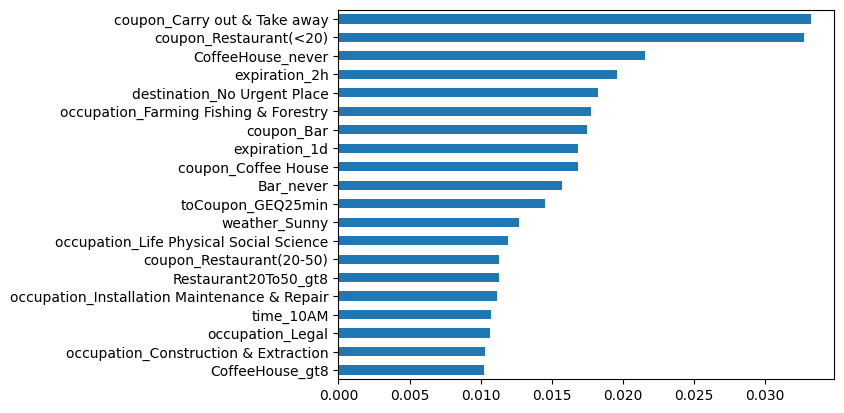

In [102]:
feature_importance = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importance.nlargest(20)[::-1].plot(kind='barh')

- The bar chart shows the top 20 features ranked by importance score and their standard deviation across all trees, indicating the variation in importance.
- The most influential feature is coupons for restaurants that cost less than 20, followed by coupons for carry out and take away, and not going to coffee houses.
- Other important features include coupons for carry out and take away, avoiding coffee houses, coupon expiration of 1 day over 2 hours, people traveling without urgency, and occupational roles like Architecture and Engineering.

In [111]:
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ['OneHot', 'Logistic Regression', 'alpha=0.005', lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc],
    ['OneHot', 'SVM Linear', 'alpha=0.0001', svc_train_accuracy, svc_test_accuracy, svc_train_auc, svc_test_auc],
    ['OneHot', 'Decision Tree', 'max_depth=10,min-sample:100 ', dt_train_accuracy, dt_test_accuracy, dt_train_auc, dt_test_auc],
    ['OneHot', 'Random Forest', 'max_depth=6, max_features=0.5, n_estimators=200', rf_train_accuracy, rf_test_accuracy, rf_train_auc, rf_test_auc],
    ['OneHot', 'XGBoost', 'max_depth=10, n_estimators=250', xgb_train_accuracy, xgb_test_accuracy, xgb_train_auc, xgb_test_auc]
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter                                  |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+-------------------------------------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31                                            |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10                                        |         0.666808 |        0.665715 |    0.713003 |   0.721614 |
| OneHot       | Logistic Regression | alpha=0.005                                     |         0.674633 |        0.68633  |    0.729965 |   0.741571 |
| OneHot       | SVM Linear          | alpha=0.000001                                  |         0.680237 |        0.693308 |    0.73507  |   0.74495  |
| OneHot       | Decision Tree       | max_depth=10,min-sample:100                

**Insights:**

- The XGBoost model with a OneHot vectorizer achieved a training AUC of approximately 0.98 and a test AUC of around 0.84. AUC values close to 1 suggest that the model achieves a good measure of separability. This means that our model has a high capacity to distinguish between the two classes.
- Among all the models trained with OneHot encoding, XGBoost has the highest training accuracy and AUC, making it the most performant in this setting. However, care should be taken to validate this in a real-world scenario or using other evaluation metrics.
- The ROC curves help us visualize the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity). For different applications, we might prioritize minimizing false positives or false negatives, and the ROC curve can guide this decision.
- While AUC provides a measure of how well the model can rank predictions, accuracy gives a direct measure of correct predictions. With a test accuracy of approximately 0.77, the model correctly predicts 77% of the instances in the test set.
In summary, the Gradient Boosting Decision Trees using XGBoost shows promising results in this classification task, demonstrating both the power of ensemble methods and the efficiency of the XGBoost algorithm.

## GQ5: How can dimensionality reduction techniques improve the performance and interpretability of our predictive models?  <a name="gq5"></a>

Reducing the number of input variables in data science improves model performance and understanding of data structures. This can lead to faster processing and better results, but effectiveness varies. We explore reduction methods and their impact on the XGBoost model in this section.

### XGBOOST + PCA

**Principal Component Analysis (PCA)** is a dimensionality reduction technique predominantly for continuous numerical data.
The following Python code showcases the PCA transformation applied to the data, and the subsequent XGBoost model training and evaluation:

In [114]:
pca = PCA(n_components=50)
X_tr_transformed = pca.fit_transform(X_train)
print('Shape before PCA: ', X_train.shape)
print('Shape after PCA: ', X_tr_transformed.shape)

Shape before PCA:  (9457, 107)
Shape after PCA:  (9457, 50)


In [115]:
X_te_transformed = pca.transform(X_test)
print('Shape before PCA: ', X_test.shape)
print('Shape after PCA: ', X_te_transformed.shape)

Shape before PCA:  (3153, 107)
Shape after PCA:  (3153, 50)


Utilization of all available cores may increase speed of calculations:

In [116]:
from multiprocessing import cpu_count
n_cores = cpu_count()

In [117]:
# With PCA
from xgboost import XGBClassifier
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

# defining the model
xgb_pca = XGBClassifier(use_label_encoder=False)

# defining the parameters
parameters = {'max_depth': [1, 5, 10, 50],'n_estimators':[50, 100, 250, 500]}

# applying GridSearchCV to the model with the parameters, and setting n_jobs=n_cores for parallel processing
xgb_classifier_pca = GridSearchCV(xgb_pca, parameters, cv=3, scoring='roc_auc',return_train_score=True, n_jobs=n_cores)
xgb_classifier_pca.fit(np.array(X_tr_transformed), y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'n_estimators': [50, 100, 250, 500]},
             return_train_score=True, scoring='roc_auc')

In [118]:
xgb_classifier_pca.best_estimator_,xgb_classifier.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=50, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 0.8175298787514537)

This approach gave us an understanding of how our data behaves when compressed using PCA and then used to train an XGBoost model best esitimators. The ROC curves visually represent the model's performance on both training and test datasets.

[0]	validation_0-logloss:0.67802	validation_1-logloss:0.68538
[1]	validation_0-logloss:0.66300	validation_1-logloss:0.67851
[2]	validation_0-logloss:0.65050	validation_1-logloss:0.67240
[3]	validation_0-logloss:0.63837	validation_1-logloss:0.66674
[4]	validation_0-logloss:0.62712	validation_1-logloss:0.66169
[5]	validation_0-logloss:0.61569	validation_1-logloss:0.65656
[6]	validation_0-logloss:0.60461	validation_1-logloss:0.65142
[7]	validation_0-logloss:0.59393	validation_1-logloss:0.64623
[8]	validation_0-logloss:0.58243	validation_1-logloss:0.64118
[9]	validation_0-logloss:0.57134	validation_1-logloss:0.63609
[10]	validation_0-logloss:0.56194	validation_1-logloss:0.63216
[11]	validation_0-logloss:0.55163	validation_1-logloss:0.62784
[12]	validation_0-logloss:0.54291	validation_1-logloss:0.62499
[13]	validation_0-logloss:0.53416	validation_1-logloss:0.62140
[14]	validation_0-logloss:0.52677	validation_1-logloss:0.61814
[15]	validation_0-logloss:0.51870	validation_1-logloss:0.61524
[1

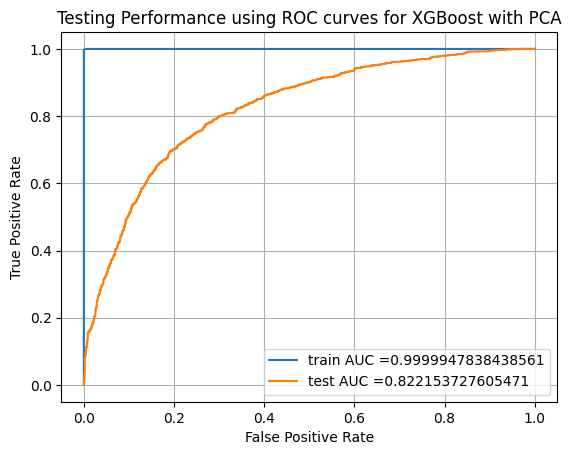

In [119]:
xgb_pca = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.8,
    gamma=0.1,
    gpu_id=-1,
    importance_type='gain',
    interaction_constraints='',
    learning_rate=0.05,
    max_delta_step=0,
    max_depth=10,
    min_child_weight=1,
    monotone_constraints='()',
    n_estimators=250, #reducing estimators
    n_jobs=12,
    num_parallel_tree=1,
    random_state=0,
    reg_alpha=1,
    reg_lambda=2,
    scale_pos_weight=1,
    subsample=0.8,
    tree_method='exact',
    use_label_encoder=False,
    validate_parameters=1,
    verbosity=None
)
eval_set = [(X_tr_transformed, y_train), (X_te_transformed, y_test)]
xgb_pca.fit(X_tr_transformed, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

y_train_pred = batch_wise_predict(xgb_pca, np.array(X_tr_transformed))
y_test_pred = batch_wise_predict(xgb_pca, np.array(X_te_transformed))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for XGBoost with PCA")
plt.grid()
plt.show()

In [120]:
# the accuracy for train and test datasets
xgb_pca_train_accuracy = accuracy_score(y_train, xgb_pca.predict(X_tr_transformed))
xgb_pca_test_accuracy = accuracy_score(y_test, xgb_pca.predict(X_te_transformed))
# the AUC for train and test datasets
xgb_pca_train_auc = auc(train_fpr, train_tpr)
xgb_pca_test_auc = auc(test_fpr, test_tpr)
print(f"Training AUC: {xgb_pca_train_auc:.2f}")
print(f"Testing AUC: {xgb_pca_test_auc:.2f}")
print(f"Training Accuracy: {xgb_pca_train_accuracy:.2f}")
print(f"Testing Accuracy: {xgb_pca_test_accuracy:.2f}")

Training AUC: 1.00
Testing AUC: 0.82
Training Accuracy: 1.00
Testing Accuracy: 0.75


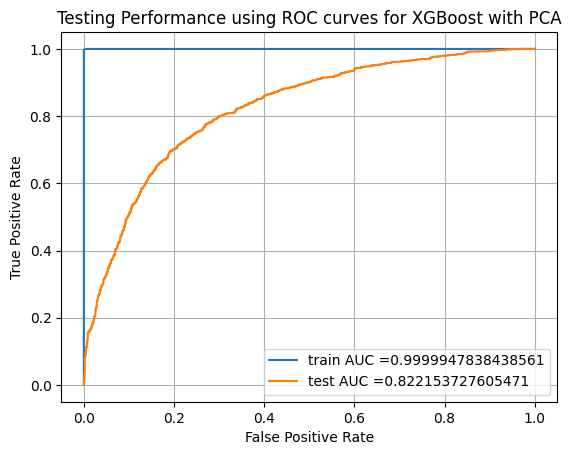

In [121]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for XGBoost with PCA")
plt.grid()
plt.show()

### MCA + XGBoost

**MCA Transformation:**
Multiple Correspondence Analysis (MCA) is used for categorical data. We applied MCA transformation to our initial non-vectorized categorical data and assessed performance with different numbers of components.



Before dummyfication, we saved the dataframe `df3` to use the MCA + XGBoost combination with varying component numbers.

In [122]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 4.7 MB/s eta 0:00:00


Select only valuable features for model and divide it to feature dataframe `X` and target column `y`. Split data to train and test parts:

In [123]:
from sklearn.model_selection import train_test_split
X = df3[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same']]
y = df3['Y']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2)



For MCA, designed for categorical variables, make all columns types as categorical:

In [124]:

for column in df3.columns:
    df3[column] = df3[column].astype('category')
df3.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children            category
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min       category
toCoupon_GEQ25min       category
direction_same          category
Y                       category
dtype: object

For loop to find optimal number of components value:

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

tr_scores = []
te_scores = []

import prince
for n in range(2, 50, 2):
    mca = prince.MCA(
        n_components=n,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=42
      )
    mca = mca.fit(X_tr)
    X_tr2 = mca.row_coordinates(X_tr)
    X_te2 = mca.transform(X_te)
    clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                   importance_type='gain', interaction_constraints='',
                   learning_rate=0.05, max_delta_step=0, max_depth=10,
                   min_child_weight=1, monotone_constraints='()',
                   n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=0,
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                   tree_method='exact',
                   validate_parameters=1, verbosity=None)
    clf.fit(X_tr2, y_tr)
    y_pred_train = clf.predict(X_tr2)
    y_pred = clf.predict(X_te2)
    train_score = accuracy_score(y_tr,y_pred_train)
    test_score = accuracy_score(y_te,y_pred)
    tr_scores.append(train_score)
    te_scores.append(test_score)
    print(f"n_components: {n}, train_score: {train_score}, test_score:{test_score}")

n_components: 2, train_score: 0.8067010309278351, test_score:0.5662172878667724
n_components: 4, train_score: 0.9104877081681205, test_score:0.6038858049167327
n_components: 6, train_score: 0.9328905630452022, test_score:0.6090404440919904
n_components: 8, train_score: 0.9569785884218874, test_score:0.6217287866772403
n_components: 10, train_score: 0.9708564631245044, test_score:0.6411578112609041
n_components: 12, train_score: 0.9820578905630452, test_score:0.6451229183187946
n_components: 14, train_score: 0.9847343378271214, test_score:0.6538461538461539
n_components: 16, train_score: 0.9914750198255353, test_score:0.6681205392545598
n_components: 18, train_score: 0.9945479777954005, test_score:0.6578112609040444
n_components: 20, train_score: 0.9949444885011896, test_score:0.6673275178429817
n_components: 22, train_score: 0.9959357652656622, test_score:0.6796193497224425
n_components: 24, train_score: 0.9979183187946075, test_score:0.6748612212529739
n_components: 26, train_score: 0

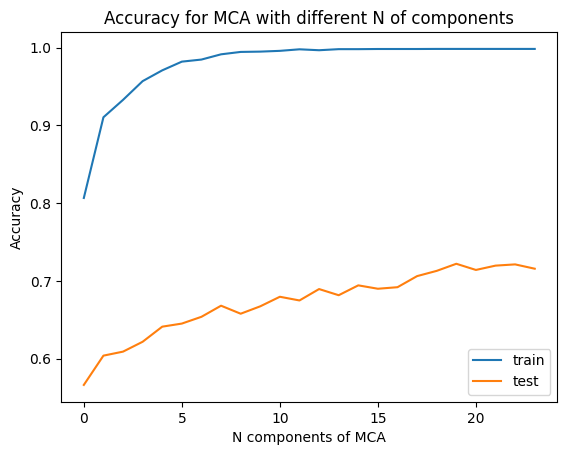

In [126]:
plt.title('Accuracy for MCA with different N of components')
plt.plot(tr_scores, label = 'train')
plt.plot(te_scores, label = 'test')
plt.xlabel('N components of MCA')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It's obvious that after `n_components` > 10, there is an overfitting, because train accuracy pursuits to 1. To consider the MCA with XGBoost we choose to train model with `n_components`=10 and calculate AUC.

In [127]:
mca = prince.MCA(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(X_tr)
X_tr2 = mca.row_coordinates(X_tr)
X_te2 = mca.transform(X_te)
X_te2

,0,1,2,3,4,5,6,7,8,9
3110,0.097795,-0.484319,0.043709,-0.017105,-0.186494,-0.242080,0.238820,0.000317,-0.334697,-0.368171
9088,-0.304433,0.039862,-0.268693,-0.107904,-0.191593,-0.270941,0.257204,-0.090932,-0.213614,-0.134650
12296,0.327526,-0.642735,-0.778725,0.641647,1.117291,0.670446,-0.436278,-0.756198,-0.407846,0.400411
8745,-0.476330,-0.556379,0.204312,0.285919,-0.299739,0.106639,-0.067639,0.385831,0.437465,0.219564
2947,-0.587648,-0.287652,0.100810,0.199249,-0.063253,-0.032549,-0.147125,-0.034415,0.000898,-0.185463
...,...,...,...,...,...,...,...,...,...,...
12428,-0.020769,-0.241562,0.466185,-0.248365,-0.161351,0.528858,-0.289810,-0.224328,0.294912,-0.270218
1530,-0.640755,-0.141766,-0.420032,0.168646,0.032639,0.012945,-0.223025,0.463688,-0.063067,-0.013122
2329,0.093911,0.285318,0.065433,-0.580825,-0.237929,-0.100410,-0.122103,-0.286285,0.212645,0.068725
7734,-0.025382,0.273106,-0.168593,0.342737,-0.517474,-0.028626,0.045691,-0.057730,0.047823,0.552960


In [128]:
%%time
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.05, max_delta_step=0, max_depth=10,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None)

clf.fit(X_tr2, y_tr)
y_pred_train = clf.predict(X_tr2)
print("Train Accuracy is ", accuracy_score(y_tr,y_pred_train)*100)
y_pred = clf.predict(X_te2)
print("Test Accuracy is ", accuracy_score(y_te,y_pred)*100)

Train Accuracy is  97.08564631245044
Test Accuracy is  64.11578112609041
CPU times: user 20.2 s, sys: 1.19 s, total: 21.4 s
Wall time: 18.5 s


In [129]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curves and AUC for training and test sets
y_train_pred = batch_wise_predict(clf, X_tr2)
y_test_pred = batch_wise_predict(clf, X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_test_pred)

# Calculate AUC values
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

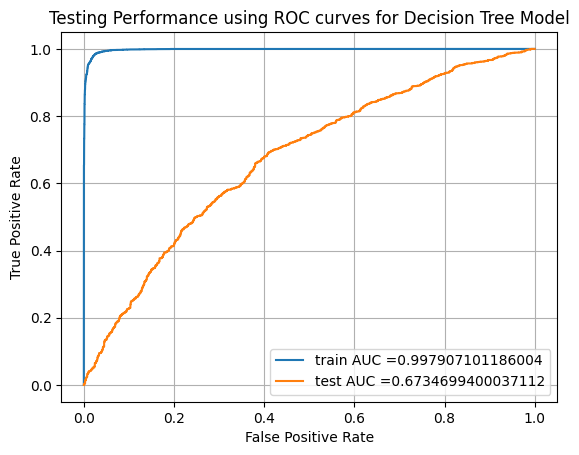

In [130]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Testing Performance using ROC curves for Decision Tree Model")
plt.grid()
plt.show()

In [131]:
# the accuracy for train and test datasets
xgb_mca_train_accuracy = accuracy_score(y_tr,y_pred_train)
xgb_mca_test_accuracy = accuracy_score(y_te,y_pred)
# the AUC for train and test datasets
xgb_mca_train_auc = auc(train_fpr, train_tpr)
xgb_mca_test_auc = auc(test_fpr, test_tpr)
print(f"Training AUC: {xgb_mca_train_auc:.2f}")
print(f"Testing AUC: {xgb_mca_test_auc:.2f}")
print(f"Training Accuracy: {xgb_mca_train_accuracy:.2f}")
print(f"Testing Accuracy: {xgb_mca_test_accuracy:.2f}")

Training AUC: 1.00
Testing AUC: 0.67
Training Accuracy: 0.97
Testing Accuracy: 0.64


In [132]:
print(tabulate([
    ['OneHot', 'XGBoost', 'max_depth=10, n_estimators=250', xgb_train_accuracy, xgb_test_accuracy, xgb_train_auc, xgb_test_auc],
    ['OneHot', 'PCA + XGBoost', 'max_depth=10, n_estimators=250', xgb_pca_train_accuracy, xgb_pca_test_accuracy, xgb_pca_train_auc, xgb_pca_test_auc],
    ['OneHot', 'MCA + XGBoost', 'max_depth=10, n_estimators=250', xgb_mca_train_accuracy, xgb_mca_test_accuracy, xgb_mca_train_auc, xgb_mca_test_auc]
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model         | HyperParameter                 |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------+--------------------------------+------------------+-----------------+-------------+------------|
| OneHot       | XGBoost       | max_depth=10, n_estimators=250 |         0.91731  |        0.765937 |    0.977269 |   0.843055 |
| OneHot       | PCA + XGBoost | max_depth=10, n_estimators=250 |         0.998414 |        0.751348 |    0.999995 |   0.822154 |
| OneHot       | MCA + XGBoost | max_depth=10, n_estimators=250 |         0.970856 |        0.641158 |    0.997907 |   0.67347  |


- PCA : In our investigation, when models were applied to PCA-transformed data, we did not observe any significant improvements in performance. A probable reason could be that PCA might not be best suited for handling relationships in data that's categorical, ordinal, or binary in nature.
- MCA : Unfortunately, the models trained on this transformed data exhibited lower accuracy and AUC when compared to models trained on One-Hot Encoded data.
- Feature Engineering:
We tried various feature engineering techniques, including transforming ordinal values into numerical labels and grouping categorical values to enhance dimensionality. However, these techniques resulted in lower accuracy metrics compared to One-Hot encoding.
- Vectorization Methods:
For our models, One-Hot encoding proved to be the most efficient vectorization method.


We considered combinations of XGBoost with PCA and MCA. Accuracy and AUC on test dataset for XGBoost without PCA and MCA are higher. It means, that for this data PCA and MCA does not give higher meaning than One-Hot encoding provided before.



## GQ6: Which machine learning models and methodologies provide the best performance for predicting coupon acceptance? <a name="gq6"></a>


We carefully analyzed multiple machine learning models to determine the optimal predictor of coupon acceptance. One-Hot encoding was used for consistency. Below is a summary of our findings:

In [133]:
print(tabulate([
    ['OneHot', 'K-Nearest Neighbors', 'k=31', knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc],
    ['OneHot', 'Naive Bayes', 'alpha=10', mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc],
    ['OneHot', 'Logistic Regression', 'alpha=0.005', lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc],
    ['OneHot', 'SVM Linear', 'alpha=0.001', svc_train_accuracy, svc_test_accuracy, svc_train_auc, svc_test_auc],
    ['OneHot', 'Decision Tree', 'max_depth=10,min-sample:100 ', dt_train_accuracy, dt_test_accuracy, dt_train_auc, dt_test_auc],
    ['OneHot', 'Random Forest', 'max_depth=6, max_features=0.5, n_estimators=500', rf_train_accuracy, rf_test_accuracy, rf_train_auc, rf_test_auc],
    ['OneHot', 'XGBoost', 'max_depth=10, n_estimators=250', xgb_train_accuracy, xgb_test_accuracy, xgb_train_auc, xgb_test_auc]
    ],
    headers=['Vectorizer', 'Model', 'HyperParameter', "Train Accuracy", "Test accuracy", "Train AUC", "Test AUC"],
    tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter                                  |   Train Accuracy |   Test accuracy |   Train AUC |   Test AUC |
|--------------+---------------------+-------------------------------------------------+------------------+-----------------+-------------+------------|
| OneHot       | K-Nearest Neighbors | k=31                                            |         0.737126 |        0.721852 |    0.719533 |   0.705061 |
| OneHot       | Naive Bayes         | alpha=10                                        |         0.666808 |        0.665715 |    0.713003 |   0.721614 |
| OneHot       | Logistic Regression | alpha=0.005                                     |         0.674633 |        0.68633  |    0.729965 |   0.741571 |
| OneHot       | SVM Linear          | alpha=0.001                                     |         0.680237 |        0.693308 |    0.73507  |   0.74495  |
| OneHot       | Decision Tree       | max_depth=10,min-sample:100                

**Key Insights:**

- We conducted a comprehensive evaluation of multiple machine learning models, fine-tuning various hyperparameters across different approaches, including K-Nearest Neighbors, Naive Bayes, Logistic Regression, SVM Linear, Decision Trees, Random Forests, and XGBoost.
- PCA vs. MCA: Both Principal Component Analysis (PCA) and Multiple Correspondence Analysis (MCA) were trialed in conjunction with XGBoost.
- The XGBoost model outperformed other models, achieving a test AUC of 0.84 and accuracy of 0.77. This showcases its efficacy for this specific prediction task.
- Other Notable Models: Decision Trees and Random Forests, although lagging slightly behind XGBoost, still showcased commendable results, indicating their potential utility for predicting coupon acceptance.

In conclusion, our extensive exploration highlighted the prowess of the XGBoost model, especially when paired with One-Hot encoding, for predicting coupon acceptance. Nonetheless, it's worth noting that the optimal model could vary based on specific datasets and business contexts.

## Conclusion <a name="conclusion"></a>

To sum up, our project involved a thorough examination of predicting the acceptance of coupons by drivers in different in-vehicle situations. We made sure to clean and organize our dataset thoroughly, ensuring its reliability and accuracy. This allowed us to delve deeper into the data and gain valuable insights.

Our exploration began with a detailed examination of the distribution and relationships between predictor variables and the target variable. We have discovered interesting insights into the dynamics of coupon acceptance by dividing our predictive variables into categories such as Coupon Details, Lifestyle Habits, Demographics, and External Factors.

During the project, we performed various data transformations, including one-hot encoding, data splitting, and assessing null accuracy, to ready ourselves for predictive modeling. In our evaluation, we focused on using the Area Under the ROC Curve (AUC) as a reliable metric to assess the performance of our models. We conducted a thorough analysis of different machine learning models and found that XGBoost had the best performance with a test AUC of 0.84 and a test accuracy of 0.77. However, Decision Trees and Random Forests also showed positive results.

To conclude, we have conducted a study on coupons and discovered that marketers can create more effective promotional strategies by considering a variety of factors such as coupon type, expiration date, demographics, and external influences.
- Certain coupon types, like "Carry Out & Take Away," "Restaurant (with a budget less than $20)," and "Bar," have a significant impact on acceptance rates. Coupons with a 1-day expiration are more likely to be accepted than those expiring in just 2 hours.
- The destination and travel time also affect coupon acceptance, with coupons linked to "No Urgent Place" destinations and longer travel times (over 25 minutes) being more likely to be accepted.
- Lifestyle and occupation also play a role, with occupations like "Architecture/Engineering," "Healthcare Support," "Farming/Fishing/Forestry," and "Installation Maintenance and Repair" having distinct preferences.

Promotions that are tailored to these preferences can be more effective.
By using these insights, businesses can design coupons that are more likely to be accepted, with the right expiration periods and targeted destinations. Understanding the preferences of specific occupational groups can also help improve marketing strategies, leading to more successful coupon campaigns.

## Future Scope <a name="fs"></a>

- **Hyperparameter Tuning and Optimization**
Continuously improving our model's performance through hyperparameter tuning and optimization is an ongoing process. By adjusting hyperparameters that govern the behavior of our machine learning algorithms, we can unlock higher predictive accuracy and better generalization to unseen data. Through careful experimentation and analysis, we can uncover optimal configurations that enable our models to capture intricate patterns and nuances within the data, leading to improved coupon acceptance predictions.
- **Exploring Neural Networks**
One innovative approach we could use in our analysis is neural networks. These networks have the ability to learn intricate connections and uncover hidden patterns that conventional models might miss. By experimenting with various architectures, activation functions, and optimization algorithms, we can explore the underlying structures that impact coupon acceptance. This exploration can reveal how features and interactions are organized and help us use deep learning techniques to improve our predictive abilities.
- **Incorporating Temporal Aspects**
To gain a more complete understanding of coupon acceptance, it would be helpful to consider time-related factors. Although our current dataset doesn't include dates, it's possible to improve our analysis by incorporating temporal features. By examining how coupon acceptance changes over time, we can identify patterns and cycles that affect coupon usage. Once we have access to date-related data, we can use time series analysis techniques to extract valuable insights from the sequence of coupon acceptance events. This knowledge can inform the development of strategies that take advantage of temporal dynamics, such as adjusting promotions based on historical trends, seasonality, and periodic fluctuations.

By following these directions, we can further analyze, improve our models, and discover valuable insights within the dataset. Utilizing hyperparameter optimization, exploring neural networks, and conducting temporal analysis (when possible) can enhance our comprehension of coupon acceptance patterns. This knowledge can help us develop strong and impactful marketing strategies for in-vehicle scenarios.

## References <a name="references"></a>
1. Adolf MiszkaAdolf Miszka&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14966 bronze badges, &amp; OxbowerceOxbowerce&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 7. (1967, October 1). Training the network with some batch size - code. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/94359/training-the-network-with-some-batch-size-code

2. Fraj, M. B. (2017, December 24). In depth: Parameter tuning for gradient
boosting. Medium. Retrieved from https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

3. Google Developers. (n.d.). Classification: ROC Curve and AUC. Retrieved from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

4. Kaggle. (n.d.). In-vehicle coupon recommendation dataset. Retrieved from https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation

5. Stack Overflow. (n.d.). How to visualize dependence of model performance & alpha with matplotlib? Retrieved from https://stackoverflow.com/a/48803361/4084039

6. Tutorialspoint. (n.d.). Scikit learn - stochastic gradient descent. Retrieved from https://www.tutorialspoint.com/scikit_learn/scikit_learn_stochastic_gradient_descent.htm

7. UCI Machine Learning Repository. (2020). In-vehicle coupon recommendation dataset. Retrieved from https://doi.org/10.24432/C5GS4P

8. Wang, T., Rudin, C., Doshi-Velez, F., Liu, Y., Klampfl, E., & MacNeille, P. (2017). A Bayesian framework for learning rule sets for interpretable classification. The Journal of Machine Learning Research, 18(1), 2357-2393.

9. Zvornicanin, E. (2023, May 31). Accuracy vs AUC in Machine Learning. Baeldung. Retrieved from https://www.baeldung.com/cs/ml-accuracy-vs-auc